C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\3868707652.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\3868707652.py:41: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\3868707652.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

Processing Standalone Data:
Epoch 1/1000
1/1 - 1s - loss: 0.6958 - val_loss: 17313.5410 - 816ms/epoch - 816ms/step
Epoch 2/1000
1/1 - 0s - loss: 0.6834 - val_loss: 14571.1113 - 37ms/epoch - 37ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.3942 - val_loss: 12007.6875 - 34ms/epoch - 34ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.3860 - val_loss: 13241.2344 - 31ms/epoch - 31ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.2502 - val_loss: 15139.7822 - 31ms/epoch - 31ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.2019 - val_loss: 15934.0537 - 32ms/epoch - 32ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.1797 - val_loss: 15686.6387 - 30ms/epoch - 30ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.1277 - val_loss: 14624.6895 - 32ms/epoch - 32ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.0896 - val_loss: 13659.8037 - 31ms/epoch - 31ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.0776 - val_loss: 13439.2578 - 31ms/epoch - 31ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.0682 - val_loss: 14024.7393 - 30ms/epoch - 30ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.

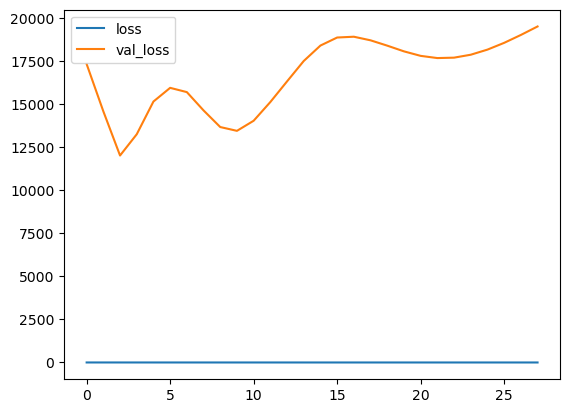

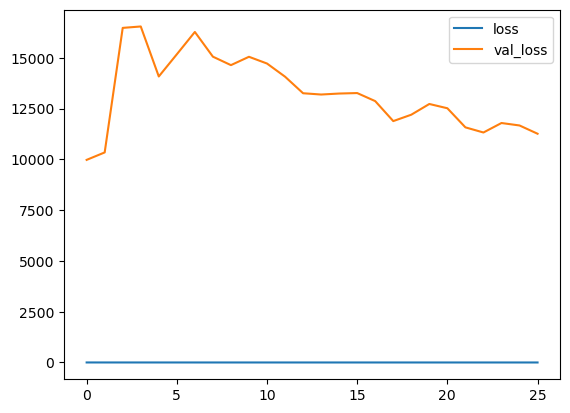

In [8]:
# -*- coding: utf-8 -*-
# IMPORT LIBRARIES AND PACKAGES
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# データセットの読み込み
dataset = pd.read_csv('C:/bankdata/outputfile.csv')

from sklearn.model_selection import train_test_split
import pandas as pd

# データを単体（Standalone）と連結（Consolidated）に分割する
standalone_data = dataset[dataset['連結フラグ'] == 0]
consolidated_data = dataset[dataset['連結フラグ'] == 1]

# トレーニング・テスト用データに分割（単体）
X_s = standalone_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_s = standalone_data['倒産フラグ']

# トレーニング・テスト用データに分割（連結）
X_c = consolidated_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_c = consolidated_data['倒産フラグ']

# データをトレーニングセットとテストセットに分ける（単体）
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# データをトレーニングセットとテストセットに分ける（連結）
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# データのクリーンアップ
# '-' を NaN に置き換え、その後 NaN を 0 に置き換える（適切な処理に応じて変更可能）
X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
X_test_s = X_test_s.replace('-', pd.NA).fillna(0)

X_train_c = X_train_c.replace('-', pd.NA).fillna(0)
X_test_c = X_test_c.replace('-', pd.NA).fillna(0)

# データ型を数値に変換
X_train_s = X_train_s.apply(pd.to_numeric, errors='coerce')
X_test_s = X_test_s.apply(pd.to_numeric, errors='coerce')

X_train_c = X_train_c.apply(pd.to_numeric, errors='coerce')
X_test_c = X_test_c.apply(pd.to_numeric, errors='coerce')

# ここからモデルにデータを渡す処理へ進みます


# データの正規化
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)


# ニューラルネットワークモデルの定義
def create_model(input_shape):
    model = Sequential([
        Dense(input_shape, input_shape=(input_shape, ), activation='relu'),
        Dense(31, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# 単体データの処理
print("Processing Standalone Data:")
model_s = create_model(X_train_s.shape[1])
early_stop_s = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# 単体データでのトレーニング
model_s.fit(X_train_s, y_train_s, batch_size=40, validation_data=(X_test_s, y_test_s),
          epochs=1000, verbose=2, callbacks=[early_stop_s])

# 損失プロット
losses_s = pd.DataFrame(model_s.history.history)
losses_s.plot()

# 単体データでの予測
y_pred_s = model_s.predict(X_test_s)
y_pred_s = np.where(y_pred_s < 0.50, 0, 1)

# 単体データの評価
print('\n\nAccuracy score for standalone data:', accuracy_score(y_test_s, y_pred_s), '\n')
print(classification_report(y_test_s, y_pred_s))
print(confusion_matrix(y_test_s, y_pred_s))

# 連結データの処理
print("Processing Consolidated Data:")
model_c = create_model(X_train_c.shape[1])
early_stop_c = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# 連結データでのトレーニング
model_c.fit(X_train_c, y_train_c, batch_size=40, validation_data=(X_test_c, y_test_c),
          epochs=1000, verbose=2, callbacks=[early_stop_c])

# 損失プロット
losses_c = pd.DataFrame(model_c.history.history)
losses_c.plot()

# 連結データでの予測
y_pred_c = model_c.predict(X_test_c)
y_pred_c = np.where(y_pred_c < 0.50, 0, 1)

# 連結データの評価
print('\n\nAccuracy score for consolidated data:', accuracy_score(y_test_c, y_pred_c), '\n')
print(classification_report(y_test_c, y_pred_c))
print(confusion_matrix(y_test_c, y_pred_c))

plt.show()


C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\2758013300.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\2758013300.py:48: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\2758013300.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

Processing Standalone Data:
Epoch 1/1000
1/1 - 1s - loss: 0.6510 - val_loss: 16632.3496 - 873ms/epoch - 873ms/step
Epoch 2/1000
1/1 - 0s - loss: 0.6699 - val_loss: 14559.4277 - 32ms/epoch - 32ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.3977 - val_loss: 13656.0361 - 32ms/epoch - 32ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.3985 - val_loss: 16767.0430 - 30ms/epoch - 30ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.2503 - val_loss: 21649.0645 - 32ms/epoch - 32ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.2169 - val_loss: 22754.3652 - 31ms/epoch - 31ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.1782 - val_loss: 21239.3262 - 31ms/epoch - 31ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.1152 - val_loss: 19607.2402 - 32ms/epoch - 32ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.0902 - val_loss: 19084.1777 - 33ms/epoch - 33ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.0800 - val_loss: 19886.2305 - 31ms/epoch - 31ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.0617 - val_loss: 21357.7188 - 31ms/epoch - 31ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.

C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


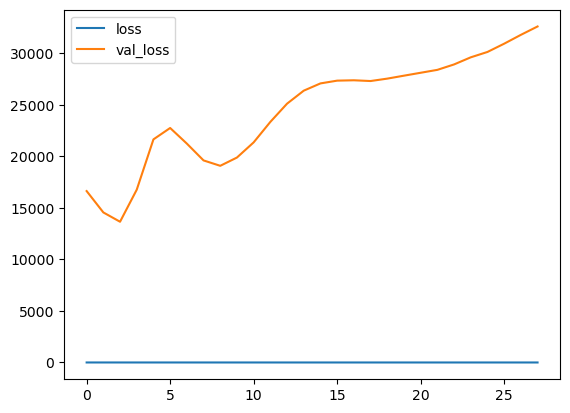

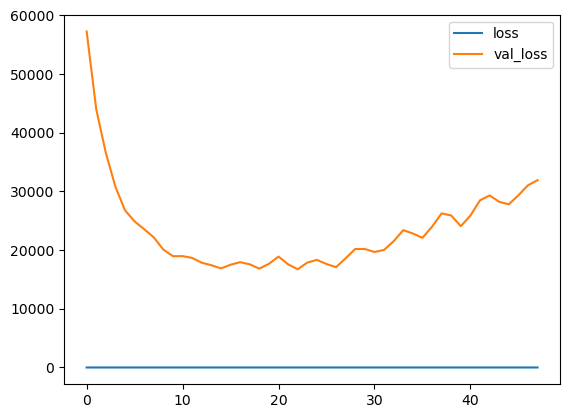

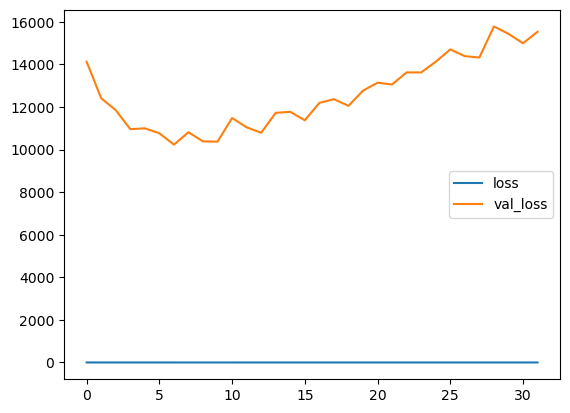

In [9]:
# -*- coding: utf-8 -*-
# IMPORT LIBRARIES AND PACKAGES
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split

# データセットの読み込み
dataset = pd.read_csv('C:/bankdata/outputfile.csv')

# データを単体（Standalone）と連結（Consolidated）に分割する
standalone_data = dataset[dataset['連結フラグ'] == 0]
consolidated_data = dataset[dataset['連結フラグ'] == 1]

# 単体・連結のデータを統合する
combined_data = pd.concat([standalone_data, consolidated_data])

# トレーニング・テスト用データに分割（単体）
X_s = standalone_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_s = standalone_data['倒産フラグ']

# トレーニング・テスト用データに分割（連結）
X_c = consolidated_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_c = consolidated_data['倒産フラグ']

# 統合データ
X_combined = combined_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_combined = combined_data['倒産フラグ']

# データをトレーニングセットとテストセットに分ける（単体）
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# データをトレーニングセットとテストセットに分ける（連結）
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# データをトレーニングセットとテストセットに分ける（統合データ）
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# データのクリーンアップ
X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
X_test_s = X_test_s.replace('-', pd.NA).fillna(0)
X_train_c = X_train_c.replace('-', pd.NA).fillna(0)
X_test_c = X_test_c.replace('-', pd.NA).fillna(0)
X_train_combined = X_train_combined.replace('-', pd.NA).fillna(0)
X_test_combined = X_test_combined.replace('-', pd.NA).fillna(0)

# データ型を数値に変換
X_train_s = X_train_s.apply(pd.to_numeric, errors='coerce')
X_test_s = X_test_s.apply(pd.to_numeric, errors='coerce')
X_train_c = X_train_c.apply(pd.to_numeric, errors='coerce')
X_test_c = X_test_c.apply(pd.to_numeric, errors='coerce')
X_train_combined = X_train_combined.apply(pd.to_numeric, errors='coerce')
X_test_combined = X_test_combined.apply(pd.to_numeric, errors='coerce')

# データの正規化
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

# ニューラルネットワークモデルの定義
def create_model(input_shape):
    model = Sequential([
        Dense(input_shape, input_shape=(input_shape, ), activation='relu'),
        Dense(31, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# 単体データの処理
print("Processing Standalone Data:")
model_s = create_model(X_train_s.shape[1])
early_stop_s = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_s.fit(X_train_s, y_train_s, batch_size=40, validation_data=(X_test_s, y_test_s),
          epochs=1000, verbose=2, callbacks=[early_stop_s])

losses_s = pd.DataFrame(model_s.history.history)
losses_s.plot()

y_pred_s = model_s.predict(X_test_s)
y_pred_s = np.where(y_pred_s < 0.50, 0, 1)

print('\n\nAccuracy score for standalone data:', accuracy_score(y_test_s, y_pred_s), '\n')
print(classification_report(y_test_s, y_pred_s))
print(confusion_matrix(y_test_s, y_pred_s))

# 連結データの処理
print("Processing Consolidated Data:")
model_c = create_model(X_train_c.shape[1])
early_stop_c = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_c.fit(X_train_c, y_train_c, batch_size=40, validation_data=(X_test_c, y_test_c),
          epochs=1000, verbose=2, callbacks=[early_stop_c])

losses_c = pd.DataFrame(model_c.history.history)
losses_c.plot()

y_pred_c = model_c.predict(X_test_c)
y_pred_c = np.where(y_pred_c < 0.50, 0, 1)

print('\n\nAccuracy score for consolidated data:', accuracy_score(y_test_c, y_pred_c), '\n')
print(classification_report(y_test_c, y_pred_c))
print(confusion_matrix(y_test_c, y_pred_c))

# 統合データの処理
print("Processing Combined Data:")
model_combined = create_model(X_train_combined.shape[1])
early_stop_combined = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_combined.fit(X_train_combined, y_train_combined, batch_size=40, validation_data=(X_test_combined, y_test_combined),
          epochs=1000, verbose=2, callbacks=[early_stop_combined])

losses_combined = pd.DataFrame(model_combined.history.history)
losses_combined.plot()

y_pred_combined = model_combined.predict(X_test_combined)
y_pred_combined = np.where(y_pred_combined < 0.50, 0, 1)

print('\n\nAccuracy score for combined data:', accuracy_score(y_test_combined, y_pred_combined), '\n')
print(classification_report(y_test_combined, y_pred_combined))
print(confusion_matrix(y_test_combined, y_pred_combined))

plt.show()


In [10]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# データセットの読み込み
dataset = pd.read_csv('C:/bankdata/outputfile.csv')

# データを単体（Standalone）と連結（Consolidated）に分割
standalone_data = dataset[dataset['連結フラグ'] == 0]
consolidated_data = dataset[dataset['連結フラグ'] == 1]

# トレーニング・テスト用データに分割（単体）
X_s = standalone_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_s = standalone_data['倒産フラグ']

# トレーニング・テスト用データに分割（連結）
X_c = consolidated_data.drop(['倒産フラグ', '証券番号'], axis=1)
y_c = consolidated_data['倒産フラグ']

# データをトレーニングセットとテストセットに分ける（単体）
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# データをトレーニングセットとテストセットに分ける（連結）
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

# データのクリーンアップ
X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
X_test_s = X_test_s.replace('-', pd.NA).fillna(0)
X_train_c = X_train_c.replace('-', pd.NA).fillna(0)
X_test_c = X_test_c.replace('-', pd.NA).fillna(0)

# データ型を数値に変換
X_train_s = X_train_s.apply(pd.to_numeric, errors='coerce')
X_test_s = X_test_s.apply(pd.to_numeric, errors='coerce')
X_train_c = X_train_c.apply(pd.to_numeric, errors='coerce')
X_test_c = X_test_c.apply(pd.to_numeric, errors='coerce')

# データの正規化
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train_s)
X_test_s = scaler.transform(X_test_s)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

# ニューラルネットワークモデルの定義
def create_nn_model(input_shape):
    model = Sequential([
        Dense(input_shape, input_shape=(input_shape, ), activation='relu'),
        Dense(31, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# モデルを適用する関数
def apply_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nAccuracy score for {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# ニューラルネットワークのモデル適用関数
def apply_nn_model(X_train, X_test, y_train, y_test, name):
    model = create_nn_model(X_train.shape[1])
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    model.fit(X_train, y_train, batch_size=40, validation_data=(X_test, y_test), epochs=1000, verbose=2, callbacks=[early_stop])
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred < 0.50, 0, 1)
    print(f"\nAccuracy score for {name}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# 各学習アルゴリズムを適用する関数
def evaluate_algorithms(X_train, X_test, y_train, y_test, data_name):
    # Logistic Regression
    print(f"\n--- Logistic Regression ({data_name}) ---")
    model_logreg = LogisticRegression()
    apply_model(model_logreg, X_train, X_test, y_train, y_test, f"Logistic Regression ({data_name})")
    
    # SVM
    print(f"\n--- SVM ({data_name}) ---")
    model_svm = SVC(kernel='linear')
    apply_model(model_svm, X_train, X_test, y_train, y_test, f"SVM ({data_name})")
    
    # Random Forest
    print(f"\n--- Random Forest ({data_name}) ---")
    model_rf = RandomForestClassifier(n_estimators=100)
    apply_model(model_rf, X_train, X_test, y_train, y_test, f"Random Forest ({data_name})")
    
    # KNN
    print(f"\n--- KNN ({data_name}) ---")
    model_knn = KNeighborsClassifier(n_neighbors=3)
    apply_model(model_knn, X_train, X_test, y_train, y_test, f"KNN ({data_name})")
    
    # Neural Network
    print(f"\n--- Neural Network ({data_name}) ---")
    apply_nn_model(X_train, X_test, y_train, y_test, f"Neural Network ({data_name})")

# 単体データの評価
print("\nEvaluating Standalone Data:")
evaluate_algorithms(X_train_s, X_test_s, y_train_s, y_test_s, "Standalone Data")

# 連結データの評価
print("\nEvaluating Consolidated Data:")
evaluate_algorithms(X_train_c, X_test_c, y_train_c, y_test_c, "Consolidated Data")

# 両方のデータを結合して評価
print("\nEvaluating Combined Data:")
X_train_combined = np.concatenate((X_train_s, X_train_c), axis=0)
X_test_combined = np.concatenate((X_test_s, X_test_c), axis=0)
y_train_combined = np.concatenate((y_train_s, y_train_c), axis=0)
y_test_combined = np.concatenate((y_test_s, y_test_c), axis=0)
evaluate_algorithms(X_train_combined, X_test_combined, y_train_combined, y_test_combined, "Combined Data")

C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\2334884832.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\2334884832.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_s = X_train_s.replace('-', pd.NA).fillna(0)
C:\Users\naoyasu.ikeda\AppData\Local\Temp\ipykernel_32460\2334884832.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be


Evaluating Standalone Data:

--- Logistic Regression (Standalone Data) ---

Accuracy score for Logistic Regression (Standalone Data): 0.7142857142857143
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7

[[4 1]
 [1 1]]

--- SVM (Standalone Data) ---

Accuracy score for SVM (Standalone Data): 0.7142857142857143
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7

[[4 1]
 [1 1]]

--- Random Forest (Standalone Data) ---

Accuracy score for Random F

C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

[[5 0]
 [2 0]]

--- KNN (Standalone Data) ---

Accuracy score for KNN (Standalone Data): 0.7142857142857143
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7

[[3 2]
 [0 2]]

--- Neural Network (Standalone Data) ---
Epoch 1/1000
1/1 - 1s - loss: 0.7239 - val_loss: 33523.1055 - 826ms/epoch - 826ms/step
Epoch 2/1000
1/1 - 0s - loss: 0.8170 - val_loss: 34786.7969 - 30ms/epoch - 30ms/step
Epoch 3/1

C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy score for KNN (Consolidated Data): 0.631578947368421
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.67      0.25      0.36         8

    accuracy                           0.63        19
   macro avg       0.65      0.58      0.55        19
weighted avg       0.64      0.63      0.58        19

[[10  1]
 [ 6  2]]

--- Neural Network (Consolidated Data) ---
Epoch 1/1000
2/2 - 1s - loss: 0.7968 - val_loss: 58065.7500 - 762ms/epoch - 381ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.5975 - val_loss: 58793.2617 - 36ms/epoch - 18ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.5456 - val_loss: 63439.9531 - 35ms/epoch - 17ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.4959 - val_loss: 65661.6484 - 35ms/epoch - 17ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.4463 - val_loss: 62699.9414 - 35ms/epoch - 17ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.4317 - val_loss: 63091.8359 - 37ms/epoch - 18ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.370

C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.80      0.40      0.53        10

    accuracy                           0.73        26
   macro avg       0.76      0.67      0.67        26
weighted avg       0.75      0.73      0.70        26

[[15  1]
 [ 6  4]]

--- KNN (Combined Data) ---

Accuracy score for KNN (Combined Data): 0.6923076923076923
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.62      0.50      0.56        10

    accuracy                           0.69        26
   macro avg       0.67      0.66      0.66        26
weighted avg       0.68      0.69      0.68        26

[[13  3]
 [ 5  5]]

--- Neural Network (Combined Data) ---
Epoch 1/1000
3/3 - 1s - loss: 0.8180 - val_loss: 79780.5469 - 914ms/epoch - 305ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.5529 - val_loss: 80359.5859 - 40ms/epoch - 13ms/step
Epoch 3

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [8]:
import shap
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'  # ←★ここを追加（または 'MS Gothic'）
import seaborn as sns

# 学習アルゴリズム
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# メトリクス
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ニューラルネットワーク
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 説明可能性ライブラリ
import shap

# 警告の抑制
import warnings
warnings.filterwarnings("ignore")


In [53]:
# データ読み込み
dataset = pd.read_csv('C:/bankdata/outputfile.csv', encoding='utf-8-sig')  # または encoding='shift_jis'

# 単体・連結に分割
standalone_data = dataset[dataset['連結フラグ'] == 0]
consolidated_data = dataset[dataset['連結フラグ'] == 1]

# 前処理共通関数
def preprocess_data(df):
    X = df.drop(['倒産フラグ', '証券番号'], axis=1).replace('-', pd.NA).fillna(0)
    X = X.apply(pd.to_numeric, errors='coerce')
    y = df['倒産フラグ'].astype(int)
    return train_test_split(X, y, test_size=0.2, random_state=42)

# 単体、連結、結合データ取得
X_train_s, X_test_s, y_train_s, y_test_s = preprocess_data(standalone_data)
X_train_c, X_test_c, y_train_c, y_test_c = preprocess_data(consolidated_data)
X_train_combined = pd.concat([X_train_s, X_train_c])
X_test_combined = pd.concat([X_test_s, X_test_c])
y_train_combined = pd.concat([y_train_s, y_train_c])
y_test_combined = pd.concat([y_test_s, y_test_c])

# 特徴量名を取得（preprocess後のX_train_sから）
feature_names = X_train_s.columns

# スケーラーのインスタンス
scaler = MinMaxScaler()

# 単体データ
X_train_s = pd.DataFrame(scaler.fit_transform(X_train_s), columns=feature_names)
X_test_s = pd.DataFrame(scaler.transform(X_test_s), columns=feature_names)

# 連結データ
X_train_c = pd.DataFrame(scaler.fit_transform(X_train_c), columns=feature_names)
X_test_c = pd.DataFrame(scaler.transform(X_test_c), columns=feature_names)

# 結合データ（正規化後に結合）
X_train_combined = pd.concat([X_train_s, X_train_c], axis=0, ignore_index=True)
X_test_combined = pd.concat([X_test_s, X_test_c], axis=0, ignore_index=True)
y_train_combined = pd.concat([y_train_s, y_train_c], axis=0, ignore_index=True)
y_test_combined = pd.concat([y_test_s, y_test_c], axis=0, ignore_index=True)


In [54]:
# ニューラルネットモデル定義
def create_nn(input_dim):
    model = Sequential([
        Dense(input_dim, input_shape=(input_dim,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# モデル適用と評価 + SHAP可視化（必要なら）
def evaluate_model(name, model, X_train, X_test, y_train, y_test, X_df=None):
    print(f"\n--- {name} ---")
    if name == "Neural Network":
        early_stop = EarlyStopping(monitor='val_loss', patience=20)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                  epochs=100, batch_size=32, verbose=0, callbacks=[early_stop])
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # SHAP可視化（可能なモデルのみ）
    if name in ["XGBoost", "LightGBM", "CatBoost", "Random Forest", "Extra Trees", "Logistic Regression"]:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_test)
        # 特徴量名も明示的に渡す
        shap.summary_plot(shap_values, features=X_df, feature_names=X_df.columns, plot_type="bar")


In [55]:
def evaluate_all_models(X_train, X_test, y_train, y_test, label, X_df=None):
    models = {
        "Logistic Regression": LogisticRegression(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": lgb.LGBMClassifier(),
        "CatBoost": cb.CatBoostClassifier(verbose=0),
        "Random Forest": RandomForestClassifier(),
        "Extra Trees": ExtraTreesClassifier(),
        "SVM": SVC(kernel='linear'),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB(),
        "VotingClassifier": VotingClassifier(estimators=[
            ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('knn', KNeighborsClassifier(n_neighbors=5))
        ], voting='hard'),
        "Neural Network": create_nn(X_train.shape[1])
    }

    print(f"\n========== {label} ==========")
    for name, model in models.items():
        evaluate_model(name, model, X_train, X_test, y_train, y_test, X_df)



========== Standalone ==========

--- Logistic Regression ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7

Confusion Matrix:
 [[4 1]
 [1 1]]


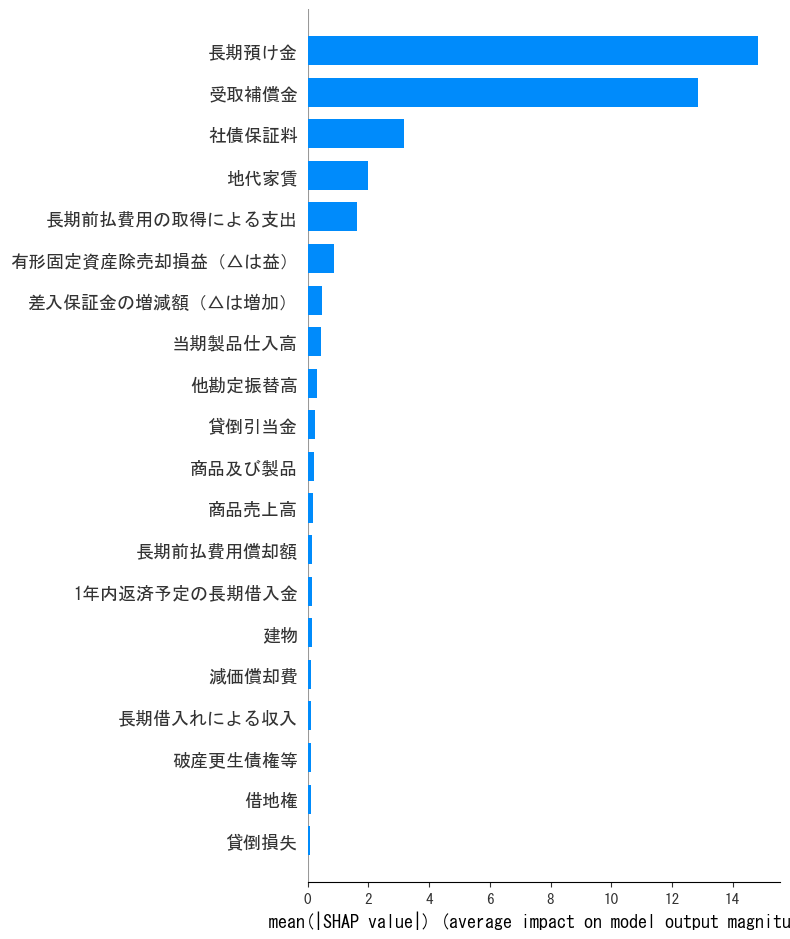


--- XGBoost ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7

Confusion Matrix:
 [[4 1]
 [1 1]]


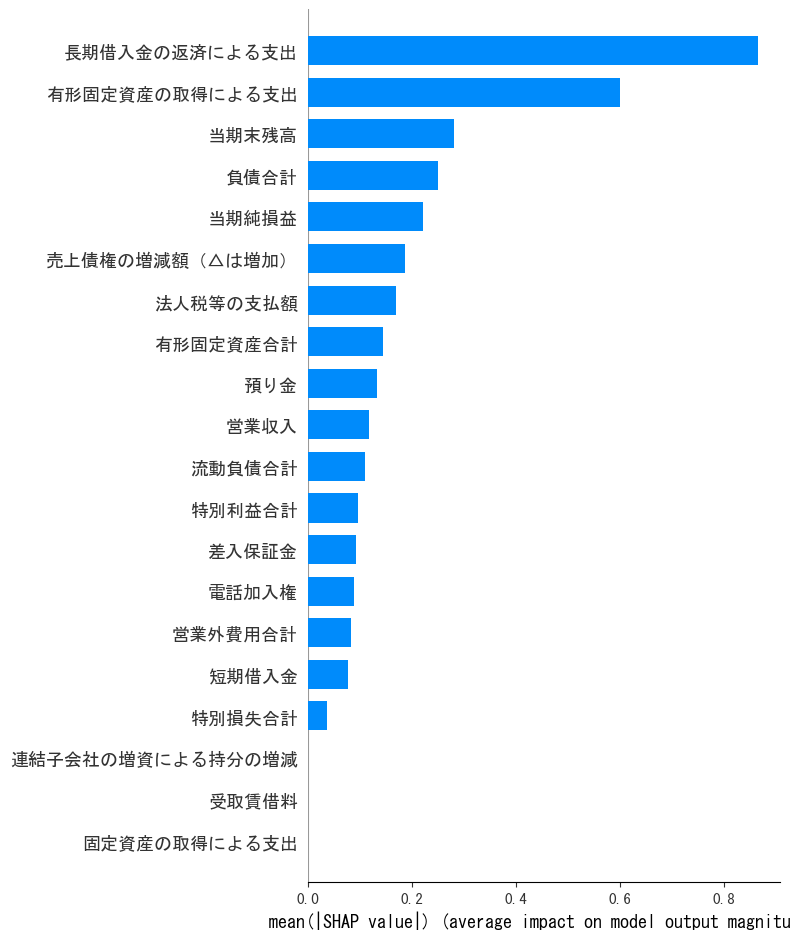


--- LightGBM ---
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 8, number of negative: 17
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 25, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320000 -> initscore=-0.753772
[LightGBM] [Info] Start training from score -0.753772
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped t

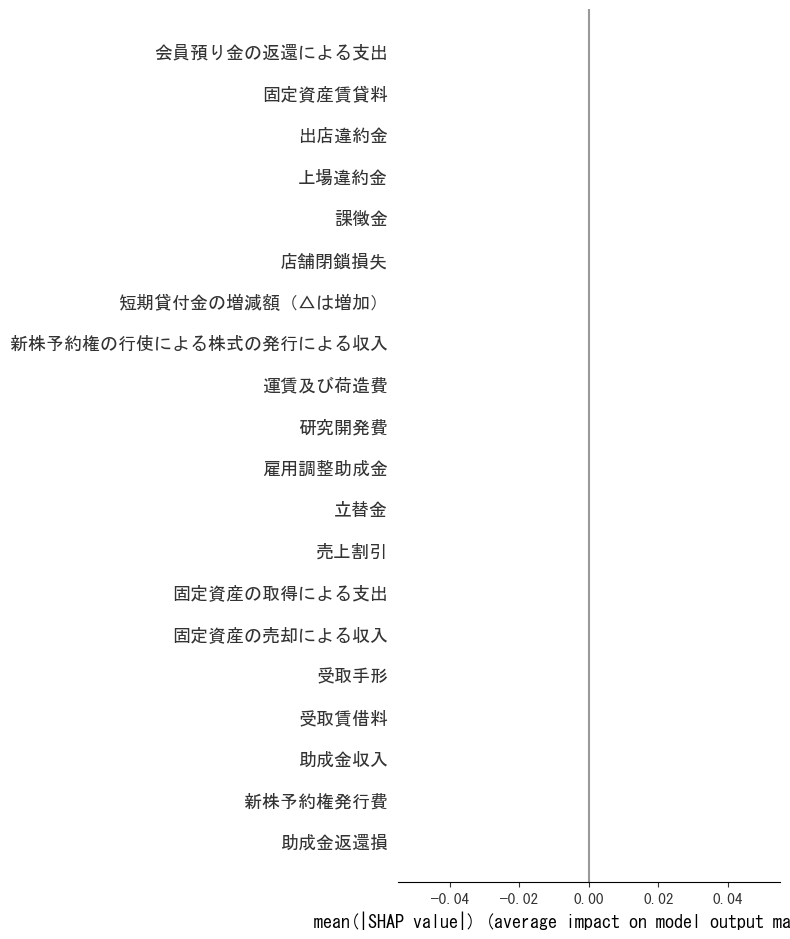


--- CatBoost ---
Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.36         7
weighted avg       0.48      0.57      0.52         7

Confusion Matrix:
 [[4 1]
 [2 0]]


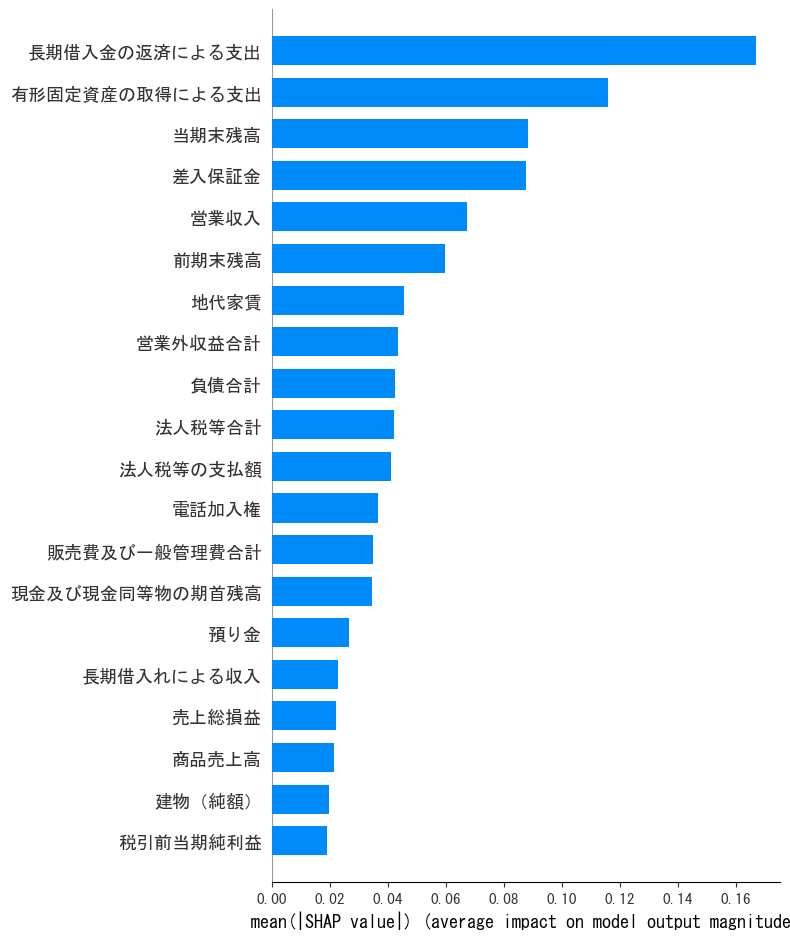


--- Random Forest ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Confusion Matrix:
 [[5 0]
 [2 0]]


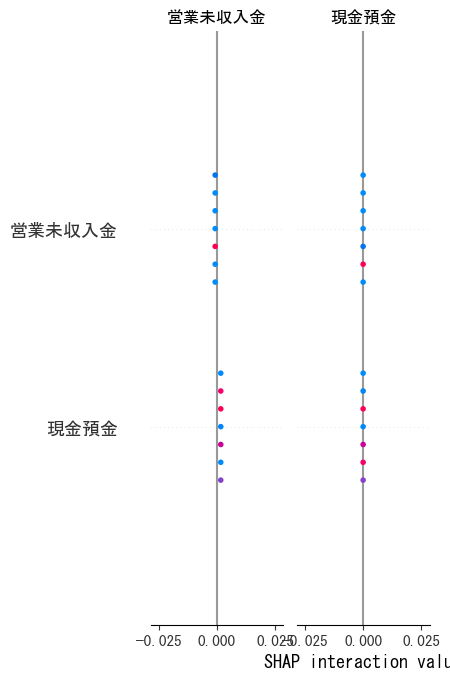


--- Extra Trees ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

Confusion Matrix:
 [[5 0]
 [2 0]]


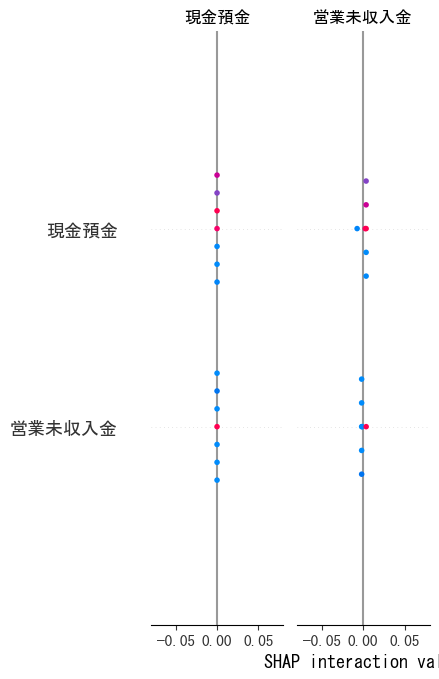


--- SVM ---
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.50      0.50         2

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7

Confusion Matrix:
 [[4 1]
 [1 1]]

--- KNN ---
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7

Confusion Matrix:
 [[4 1]
 [0 2]]

--- Naive Bayes ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       

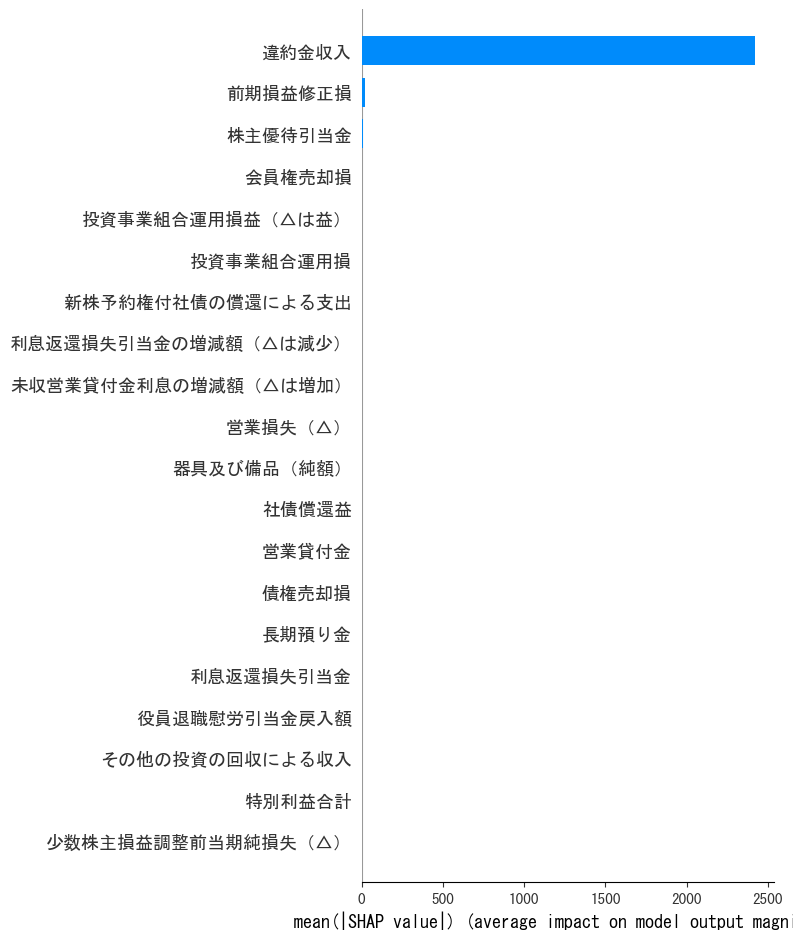


--- XGBoost ---
Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.38      0.55         8

    accuracy                           0.74        19
   macro avg       0.84      0.69      0.68        19
weighted avg       0.82      0.74      0.70        19

Confusion Matrix:
 [[11  0]
 [ 5  3]]


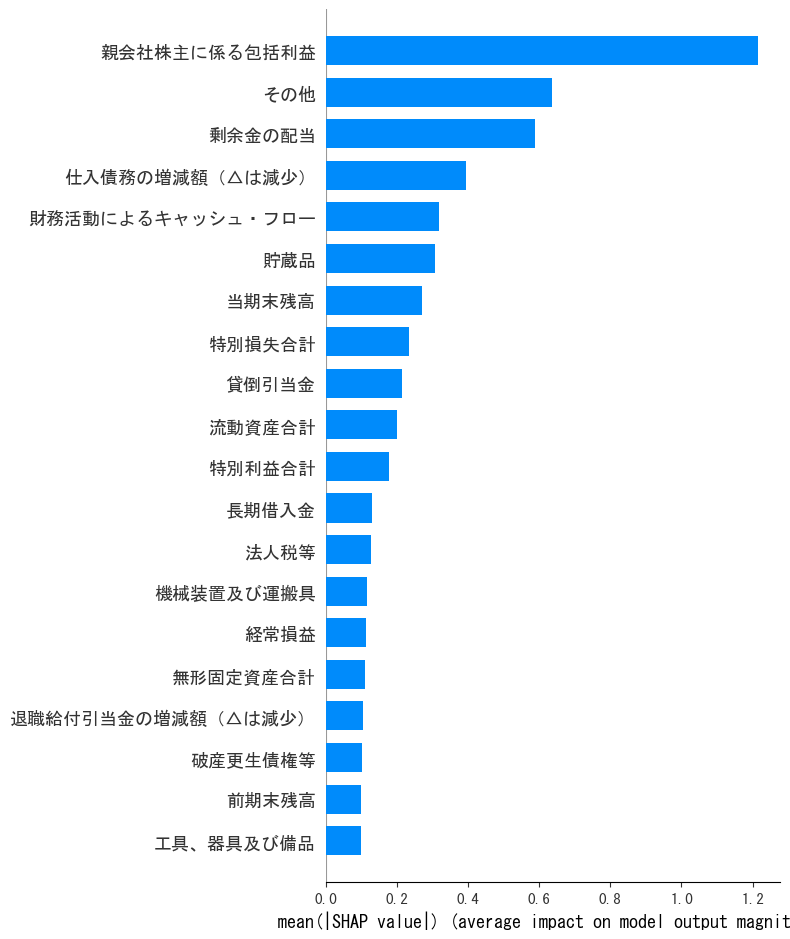


--- LightGBM ---
[LightGBM] [Info] Number of positive: 21, number of negative: 51
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2165
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 122
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291667 -> initscore=-0.887303
[LightGBM] [Info] Start training from score -0.887303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

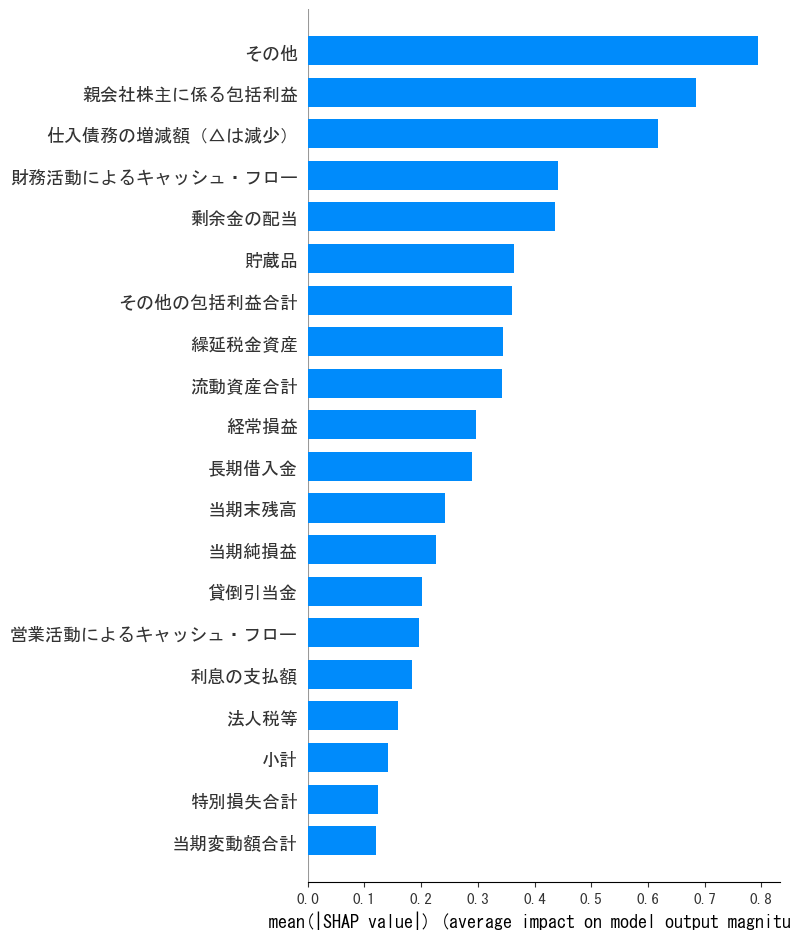


--- CatBoost ---
Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.50      0.67         8

    accuracy                           0.79        19
   macro avg       0.87      0.75      0.76        19
weighted avg       0.85      0.79      0.77        19

Confusion Matrix:
 [[11  0]
 [ 4  4]]


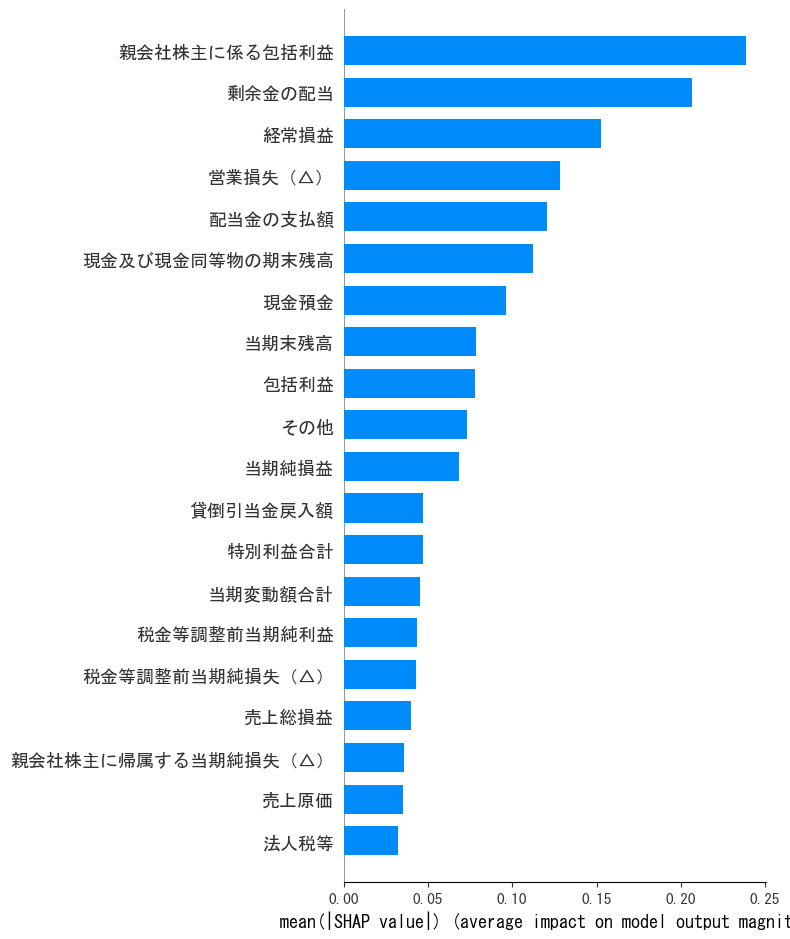


--- Random Forest ---
Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.50      0.67         8

    accuracy                           0.79        19
   macro avg       0.87      0.75      0.76        19
weighted avg       0.85      0.79      0.77        19

Confusion Matrix:
 [[11  0]
 [ 4  4]]


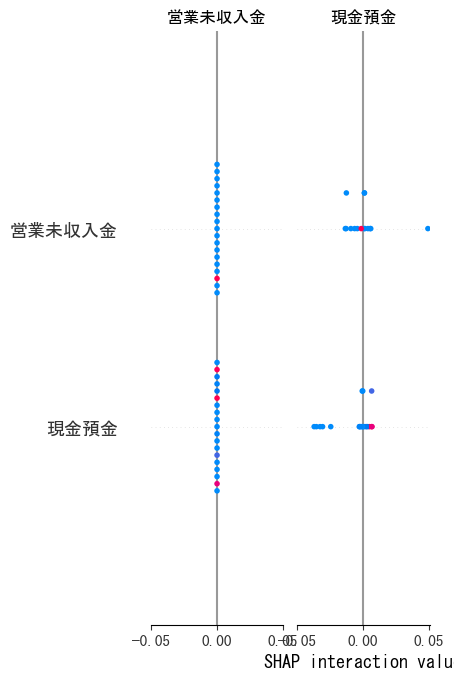


--- Extra Trees ---
Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       1.00      0.25      0.40         8

    accuracy                           0.68        19
   macro avg       0.82      0.62      0.59        19
weighted avg       0.80      0.68      0.62        19

Confusion Matrix:
 [[11  0]
 [ 6  2]]


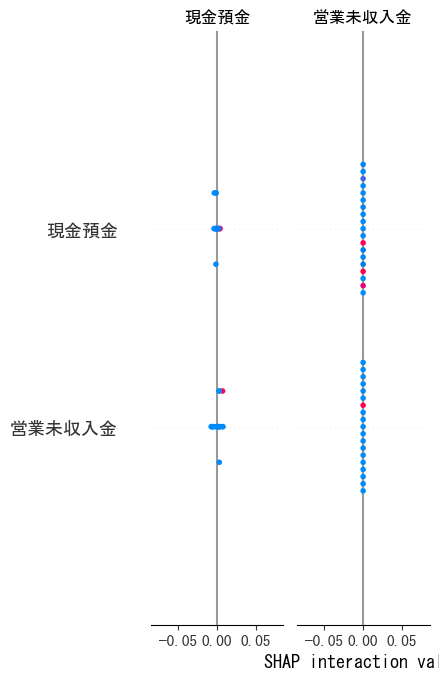


--- SVM ---
Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.75      0.38      0.50         8

    accuracy                           0.68        19
   macro avg       0.71      0.64      0.63        19
weighted avg       0.70      0.68      0.66        19

Confusion Matrix:
 [[10  1]
 [ 5  3]]

--- KNN ---
Accuracy: 0.631578947368421
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       1.00      0.12      0.22         8

    accuracy                           0.63        19
   macro avg       0.81      0.56      0.49        19
weighted avg       0.77      0.63      0.53        19

Confusion Matrix:
 [[11  0]
 [ 7  1]]

--- Naive Bayes ---
Accuracy: 0.631578947368421
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.67      

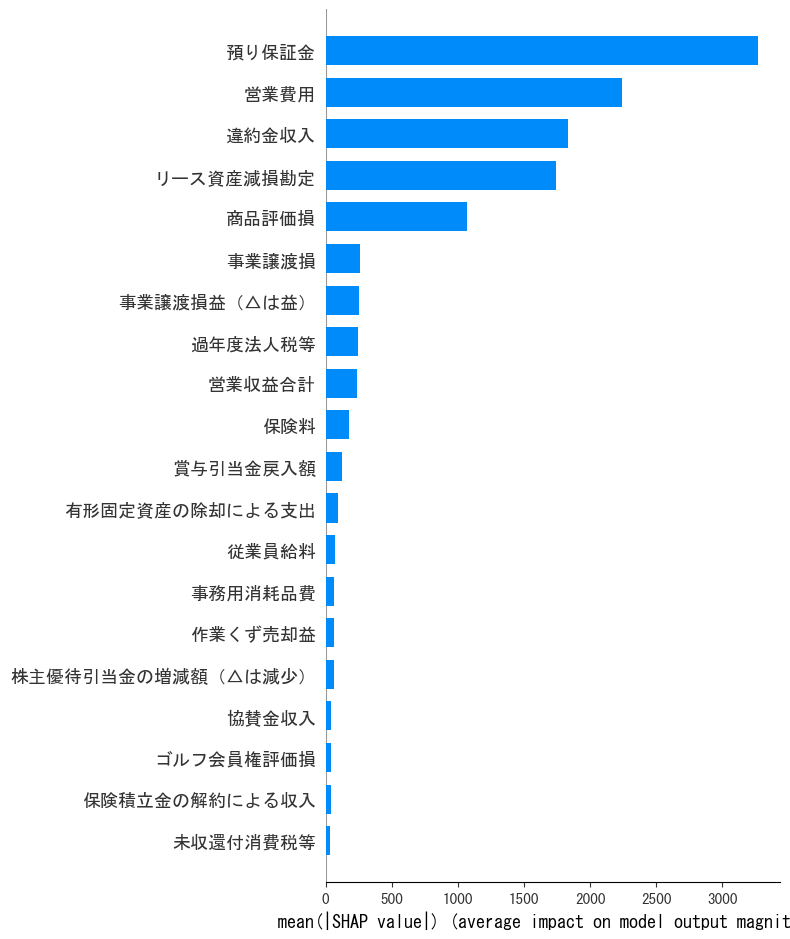


--- XGBoost ---
Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.70      0.70      0.70        10

    accuracy                           0.77        26
   macro avg       0.76      0.76      0.76        26
weighted avg       0.77      0.77      0.77        26

Confusion Matrix:
 [[13  3]
 [ 3  7]]


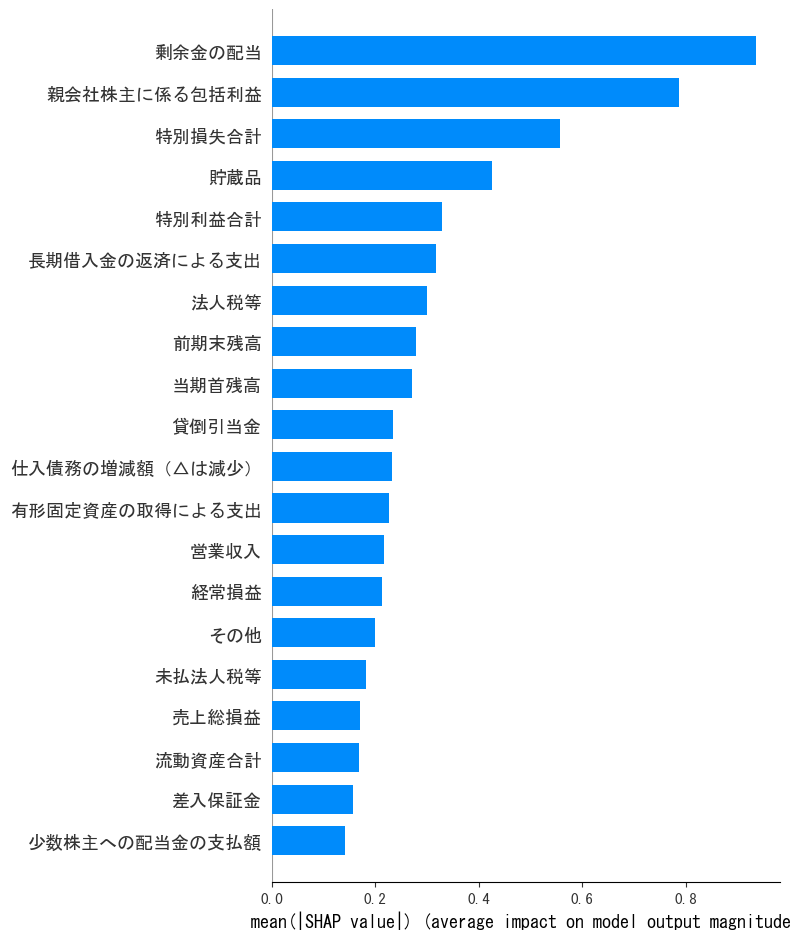


--- LightGBM ---
[LightGBM] [Info] Number of positive: 29, number of negative: 68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3690
[LightGBM] [Info] Number of data points in the train set: 97, number of used features: 395
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.298969 -> initscore=-0.852212
[LightGBM] [Info] Start training from score -0.852212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

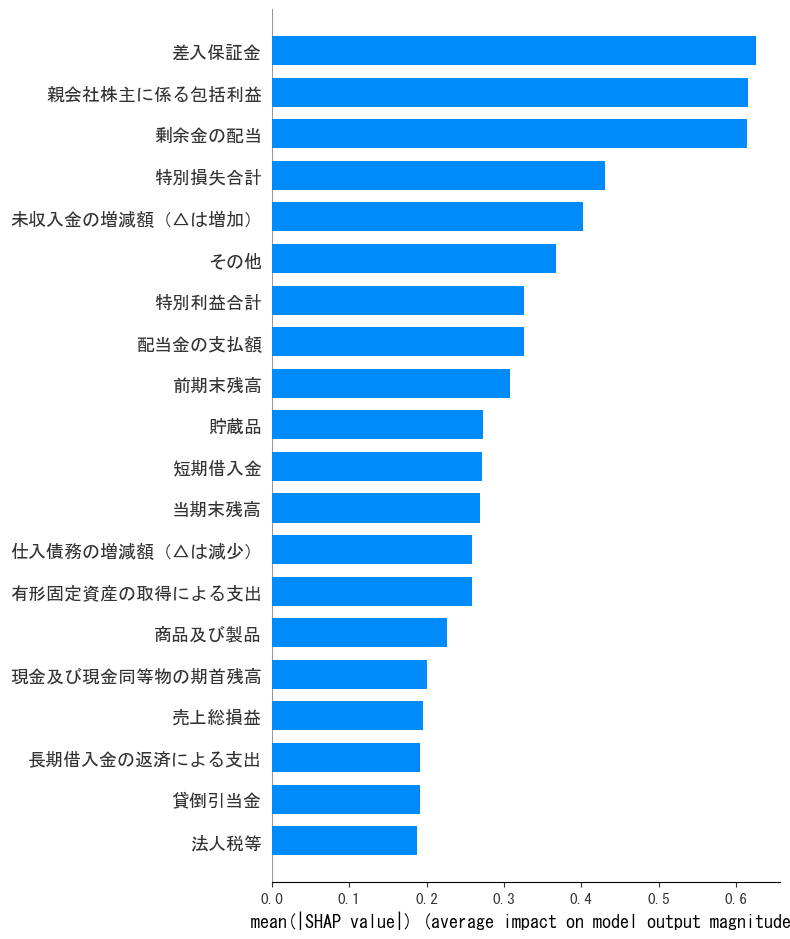


--- CatBoost ---
Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.75      0.60      0.67        10

    accuracy                           0.77        26
   macro avg       0.76      0.74      0.75        26
weighted avg       0.77      0.77      0.76        26

Confusion Matrix:
 [[14  2]
 [ 4  6]]


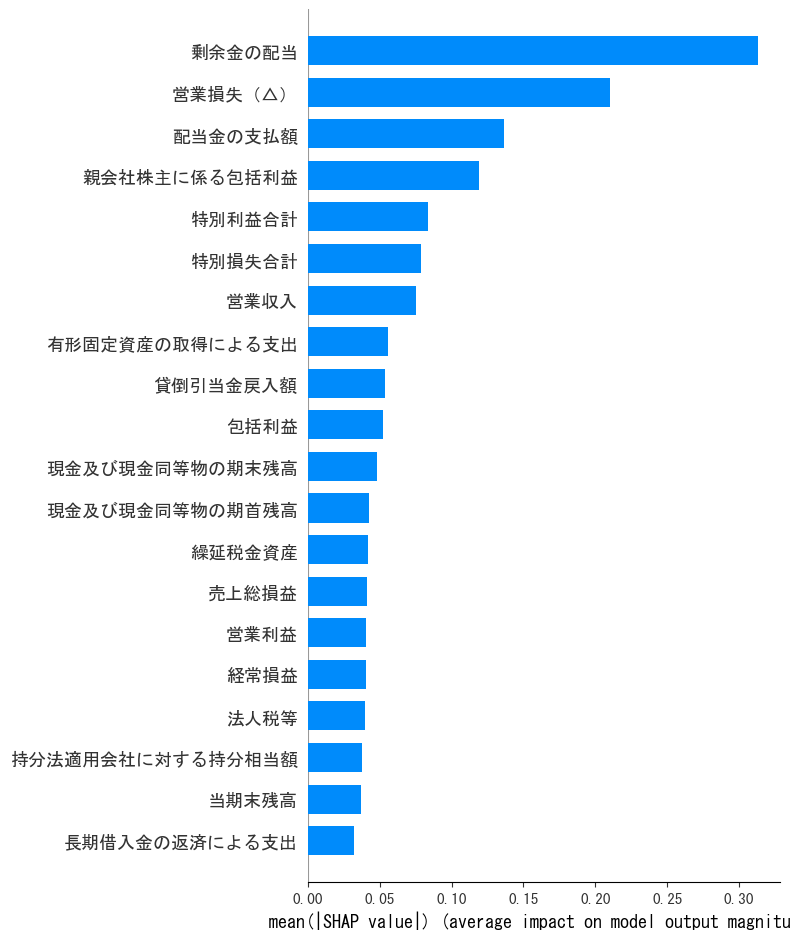


--- Random Forest ---
Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.40      0.57        10

    accuracy                           0.77        26
   macro avg       0.86      0.70      0.71        26
weighted avg       0.83      0.77      0.74        26

Confusion Matrix:
 [[16  0]
 [ 6  4]]


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.800000, while the model output was 0.810000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [56]:
# SHAPで使うためにDataFrame型も渡す
evaluate_all_models(X_train_s, X_test_s, y_train_s, y_test_s, "Standalone", X_df=X_test_s)
evaluate_all_models(X_train_c, X_test_c, y_train_c, y_test_c, "Consolidated", X_df=X_test_c)
evaluate_all_models(X_train_combined, X_test_combined, y_train_combined, y_test_combined, "Combined", X_df=X_test_combined)


In [14]:
import chardet

# ファイルのバイナリ読み込み
with open('C:/bankdata/outputfile.csv', 'rb') as f:
    result = chardet.detect(f.read())

print("判定された文字コード:", result['encoding'])

# 判定された文字コードで読み込む
dataset = pd.read_csv('C:/bankdata/outputfile.csv', encoding=result['encoding'])

判定された文字コード: UTF-8-SIG


In [1]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'  # プロットの日本語対応
import seaborn as sns

# データ処理と前処理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 線形モデル系
from sklearn.linear_model import LogisticRegression, SGDClassifier

# 決定木・ブースティング系
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
import xgboost as xgb
import catboost as cb

# カーネル系
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

# 近傍系
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

# ベイズ系 / 分布識別系
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# ニューラルネット系
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import os


In [2]:
# メトリクス
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 説明可能性ライブラリ
import shap

# 警告の抑制
import warnings
warnings.filterwarnings("ignore")

C:\Users\naoyasu.ikeda\.conda\envs\an_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# データ読み込み
dataset = pd.read_csv('C:/bankdata/resampled_datasets_combined/combined_1_to_20.csv', encoding='utf-8-sig')  # 文字化け対策済み

# 単体・連結に分割
standalone_data = dataset[dataset['連結フラグ'] == 0]
consolidated_data = dataset[dataset['連結フラグ'] == 1]

# 共通前処理関数
def preprocess_data(df):
    X = df.drop(['倒産フラグ', '証券番号'], axis=1).replace('-', pd.NA).fillna(0)
    X = X.apply(pd.to_numeric, errors='coerce')
    y = df['倒産フラグ'].astype(int)
    return train_test_split(X, y, test_size=0.2, random_state=42)

# 単体・連結データに前処理適用
X_train_s, X_test_s, y_train_s, y_test_s = preprocess_data(standalone_data)
X_train_c, X_test_c, y_train_c, y_test_c = preprocess_data(consolidated_data)

# 特徴量名の取得（以降の DataFrame に使う）
feature_names = X_train_s.columns

# 正規化処理（スケーラーは個別にフィットする）
scaler_s = MinMaxScaler()
scaler_c = MinMaxScaler()

# 単体データのスケーリング
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), columns=feature_names)
X_test_s = pd.DataFrame(scaler_s.transform(X_test_s), columns=feature_names)

# 連結データのスケーリング
X_train_c = pd.DataFrame(scaler_c.fit_transform(X_train_c), columns=feature_names)
X_test_c = pd.DataFrame(scaler_c.transform(X_test_c), columns=feature_names)

# 結合データの作成
X_train_combined = pd.concat([X_train_s, X_train_c], ignore_index=True)
X_test_combined = pd.concat([X_test_s, X_test_c], ignore_index=True)
y_train_combined = pd.concat([y_train_s, y_train_c], ignore_index=True)
y_test_combined = pd.concat([y_test_s, y_test_c], ignore_index=True)


In [15]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, X_df=None, label=""):
    # 欠損処理（モデル名に応じて補完 or スキップ）
    X_train, X_test = safe_preprocess(X_train, X_test, name)
    print(f"\n--- {label} / {name} ---")

    # --- 学習と予測 ---
    if name == "Neural Network":
        early_stop = EarlyStopping(monitor='val_loss', patience=20)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                  epochs=100, batch_size=32, verbose=0, callbacks=[early_stop])
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        model.fit(X_train, y_train)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            y_pred = (y_pred_proba > 0.5).astype(int)
        else:
            y_pred = model.predict(X_test)

    # --- メトリクス計算 ---
    acc = accuracy_score(y_test, y_pred)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # --- 結果表示 ---
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", cm)

    # --- 評価スコア保存 ---
    save_dir = "results"
    os.makedirs(save_dir, exist_ok=True)
    score_df = pd.DataFrame(report_dict).transpose()
    score_df["accuracy"] = acc
    score_df["構成"] = label
    score_df["モデル"] = name
    cm_df = pd.DataFrame(cm, index=["True_0", "True_1"], columns=["Pred_0", "Pred_1"])

    # Excel保存
    excel_path = os.path.join(save_dir, f"{label}_{name}_評価結果_1_to_20.xlsx")
    with pd.ExcelWriter(excel_path) as writer:
        score_df.to_excel(writer, sheet_name="評価指標")
        cm_df.to_excel(writer, sheet_name="Confusion Matrix")

    # CSV保存
    score_csv_path = os.path.join(save_dir, f"{label}_{name}_評価結果_1_to_20.csv")
    score_df.to_csv(score_csv_path, encoding='utf-8-sig')

    # --- SHAP可視化と影響度出力 ---
    shap_supported = [
        "Logistic Regression", "SGDClassifier", "Random Forest",
        "Extra Trees", "XGBoost", "CatBoost", "Gradient Boosting"
    ]
    if X_df is not None and name in shap_supported:
        try:
            # explainer
            if any(k in name for k in ["XGBoost", "CatBoost", "Random Forest", "Extra Trees", "Gradient Boosting"]):
                explainer = shap.Explainer(model, X_train)
                shap_values = explainer(X_test, check_additivity=False)
            elif any(k in name for k in ["Logistic Regression", "SGDClassifier"]):
                explainer = shap.Explainer(model, X_train)
                shap_values = explainer(X_test)
            else:
                X_sample = shap.sample(X_train, min(100, len(X_train)))
                explainer = shap.KernelExplainer(model.predict_proba, X_sample)
                shap_values = explainer.shap_values(X_test)

            # summary plot
            if isinstance(shap_values, list):
                shap_matrix = np.abs(shap_values[0])
                shap.summary_plot(shap_matrix, features=X_df, feature_names=X_df.columns, plot_type="bar")
            elif hasattr(shap_values, "values"):
                if shap_values.values.ndim == 3:
                    shap_matrix = np.mean(np.abs(shap_values.values), axis=2)
                else:
                    shap_matrix = np.abs(shap_values.values)
                shap.summary_plot(shap_matrix, features=X_df, feature_names=X_df.columns, plot_type="bar")
            else:
                print("SHAP可視化スキップ：shap_values形式が不明")
                return

            # SHAP平均値計算と上位10特徴量表示
            if shap_matrix.ndim == 2:
                shap_mean = np.mean(shap_matrix, axis=0)
                top_idx = np.argsort(shap_mean)[::-1][:10]
                print("\nSHAP 平均影響度（上位10特徴量）:")
                for idx in top_idx:
                    print(f"{X_df.columns[idx]}: {shap_mean[idx]:.4f}")

                # 保存
                shap_df = pd.DataFrame({
                    "Feature": X_df.columns,
                    "SHAP平均影響度": shap_mean,
                    "構成": label,
                    "モデル": name
                }).sort_values("SHAP平均影響度", ascending=False)

                shap_csv = os.path.join(save_dir, f"{label}_{name}_SHAP影響度_1_to_20.csv")
                shap_xlsx = os.path.join(save_dir, f"{label}_{name}_SHAP影響度_1_to_20.xlsx")
                shap_df.to_csv(shap_csv, index=False, encoding='utf-8-sig')
                shap_df.to_excel(shap_xlsx, index=False)

        except Exception as e:
            print(f"SHAP可視化に失敗しました: {e}")


In [9]:
# ニューラルネットモデル定義
def create_nn(input_dim):
    model = Sequential([
        Dense(input_dim, input_shape=(input_dim,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

def evaluate_all_models(X_train, X_test, y_train, y_test, label, X_df=None):
    models = {
        # 線形系
        #"Logistic Regression": LogisticRegression(),
        #"SGDClassifier": SGDClassifier(max_iter=1000, tol=1e-3),

        # カーネル系
        #"SVM": SVC(kernel='linear', probability=True),
        #"Gaussian Process": GaussianProcessClassifier(),

        # 決定木系
        #"Random Forest": RandomForestClassifier(),
        #"Extra Trees": ExtraTreesClassifier(),
        #"XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        #"CatBoost": cb.CatBoostClassifier(verbose=0),
        #"Gradient Boosting": GradientBoostingClassifier(),

        # 近傍系
        #"KNN": KNeighborsClassifier(n_neighbors=5),
       # "Nearest Centroid": NearestCentroid(),

        # 分布識別系
       # "Naive Bayes": GaussianNB(),
       # "QDA": QuadraticDiscriminantAnalysis(),
        #"LDA": LinearDiscriminantAnalysis(),

        # アンサンブル
       # "VotingClassifier": VotingClassifier(estimators=[
       #     ('lr', LogisticRegression()), 
       ##     ('rf', RandomForestClassifier()), 
       #     ('knn', KNeighborsClassifier(n_neighbors=5))
       # ], voting='hard'),

        # ニューラルネット
        "Neural Network": create_nn(X_train.shape[1]),
       # "MLP": MLPClassifier(max_iter=500)
    }

    print(f"\n========== {label} ==========")
    for name, model in models.items():
        evaluate_model(name, model, X_train, X_test, y_train, y_test, X_df, label)



========== Standalone ==========

--- Standalone / Logistic Regression ---
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.33      0.33      0.33         3

    accuracy                           0.94        68
   macro avg       0.65      0.65      0.65        68
weighted avg       0.94      0.94      0.94        68

Confusion Matrix:
 [[63  2]
 [ 2  1]]


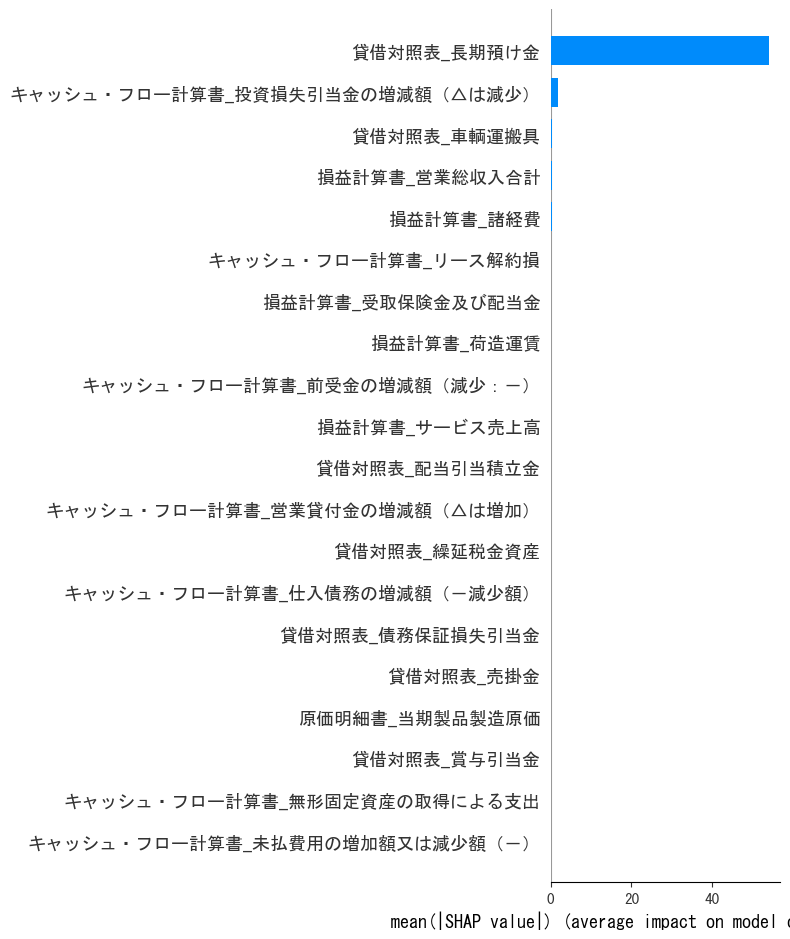


SHAP 平均影響度（上位10特徴量）:
貸借対照表_長期預け金: 54.1296
キャッシュ・フロー計算書_投資損失引当金の増減額（△は減少）: 1.7381
貸借対照表_車輌運搬具: 0.3977
損益計算書_営業総収入合計: 0.3284
損益計算書_諸経費: 0.2129
キャッシュ・フロー計算書_リース解約損: 0.1252
損益計算書_受取保険金及び配当金: 0.1148
損益計算書_荷造運賃: 0.0792
キャッシュ・フロー計算書_前受金の増減額（減少：－）: 0.0534
損益計算書_サービス売上高: 0.0516

--- Standalone / SGDClassifier ---
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.50      0.67      0.57         3

    accuracy                           0.96        68
   macro avg       0.74      0.82      0.77        68
weighted avg       0.96      0.96      0.96        68

Confusion Matrix:
 [[63  2]
 [ 1  2]]


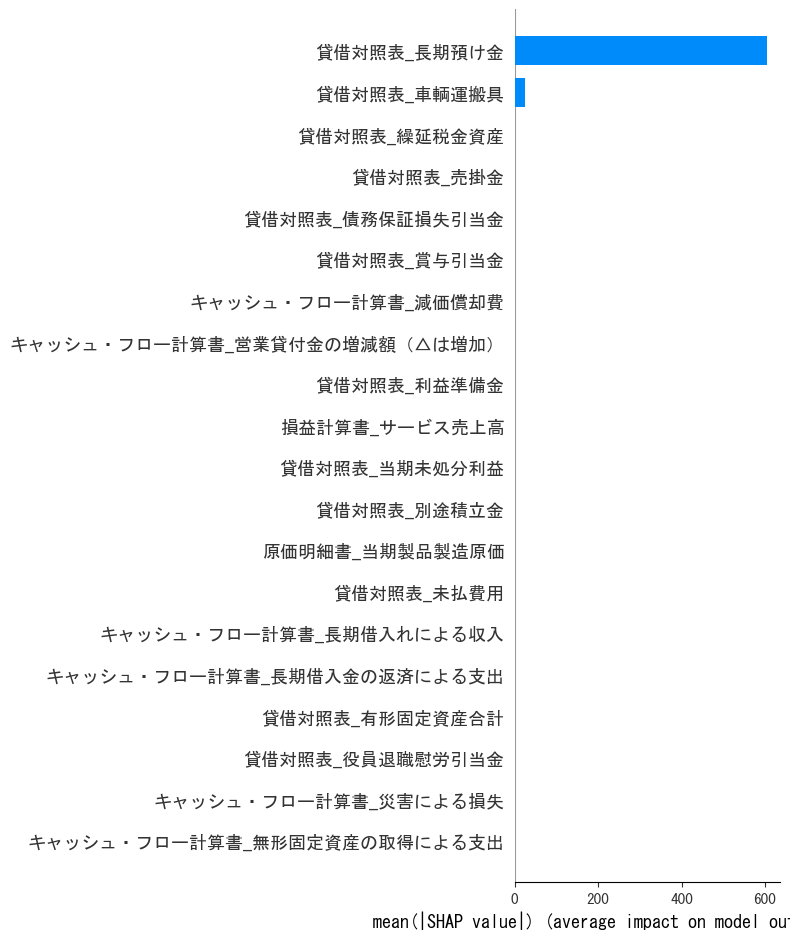


SHAP 平均影響度（上位10特徴量）:
貸借対照表_長期預け金: 605.7127
貸借対照表_車輌運搬具: 24.1523
貸借対照表_繰延税金資産: 1.3651
貸借対照表_売掛金: 1.2871
貸借対照表_債務保証損失引当金: 1.0489
貸借対照表_賞与引当金: 0.9290
キャッシュ・フロー計算書_減価償却費: 0.9105
キャッシュ・フロー計算書_営業貸付金の増減額（△は増加）: 0.8918
貸借対照表_利益準備金: 0.8266
損益計算書_サービス売上高: 0.7682

--- Standalone / SVM ---
Accuracy: 0.8676470588235294
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.12      0.33      0.18         3

    accuracy                           0.87        68
   macro avg       0.55      0.61      0.55        68
weighted avg       0.93      0.87      0.90        68

Confusion Matrix:
 [[58  7]
 [ 2  1]]

--- Standalone / Gaussian Process ---
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       0.00      0.00      0.00         3

    accuracy                           0.96        68
   macro avg       0.48      0.50      0

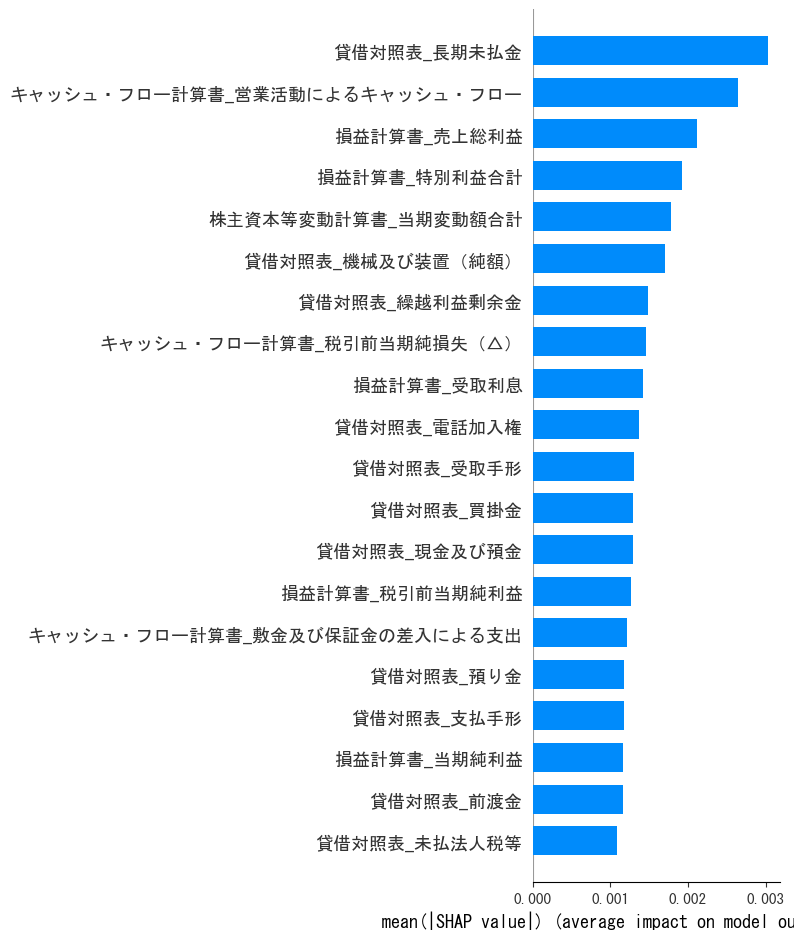


SHAP 平均影響度（上位10特徴量）:
貸借対照表_長期未払金: 0.0030
キャッシュ・フロー計算書_営業活動によるキャッシュ・フロー: 0.0026
損益計算書_売上総利益: 0.0021
損益計算書_特別利益合計: 0.0019
株主資本等変動計算書_当期変動額合計: 0.0018
貸借対照表_機械及び装置（純額）: 0.0017
貸借対照表_繰越利益剰余金: 0.0015
キャッシュ・フロー計算書_税引前当期純損失（△）: 0.0015
損益計算書_受取利息: 0.0014
貸借対照表_電話加入権: 0.0014

--- Standalone / Extra Trees ---
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       0.00      0.00      0.00         3

    accuracy                           0.96        68
   macro avg       0.48      0.50      0.49        68
weighted avg       0.91      0.96      0.93        68

Confusion Matrix:
 [[65  0]
 [ 3  0]]


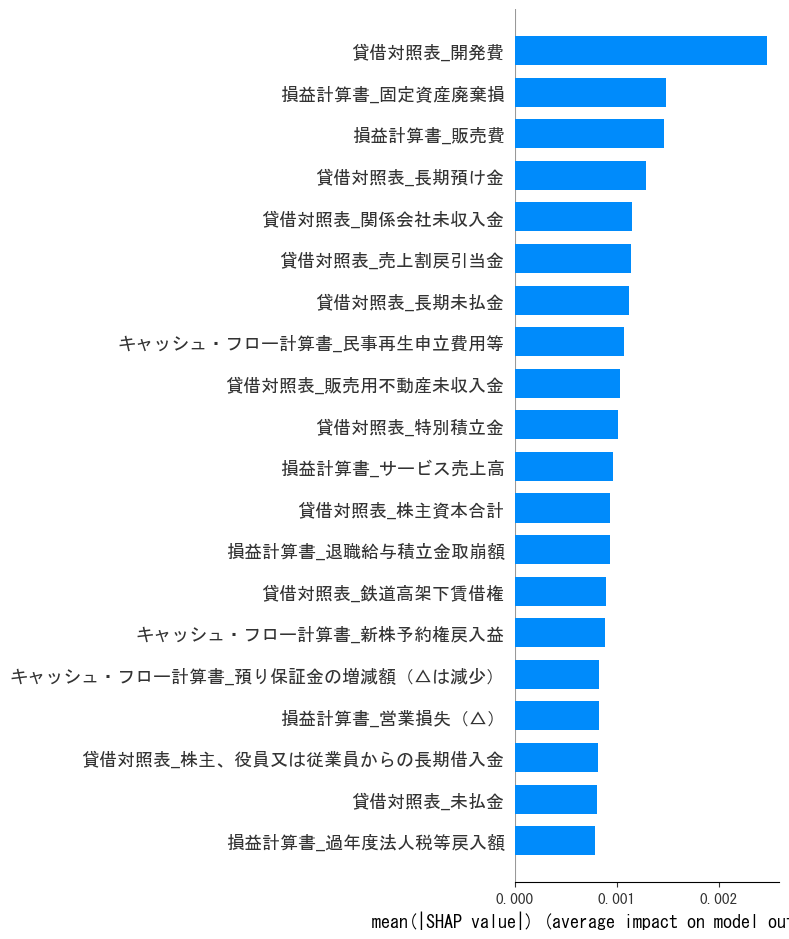


SHAP 平均影響度（上位10特徴量）:
貸借対照表_開発費: 0.0025
損益計算書_固定資産廃棄損: 0.0015
損益計算書_販売費: 0.0015
貸借対照表_長期預け金: 0.0013
貸借対照表_関係会社未収入金: 0.0011
貸借対照表_売上割戻引当金: 0.0011
貸借対照表_長期未払金: 0.0011
キャッシュ・フロー計算書_民事再生申立費用等: 0.0011
貸借対照表_販売用不動産未収入金: 0.0010
貸借対照表_特別積立金: 0.0010

--- Standalone / XGBoost ---
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       0.00      0.00      0.00         3

    accuracy                           0.96        68
   macro avg       0.48      0.50      0.49        68
weighted avg       0.91      0.96      0.93        68

Confusion Matrix:
 [[65  0]
 [ 3  0]]


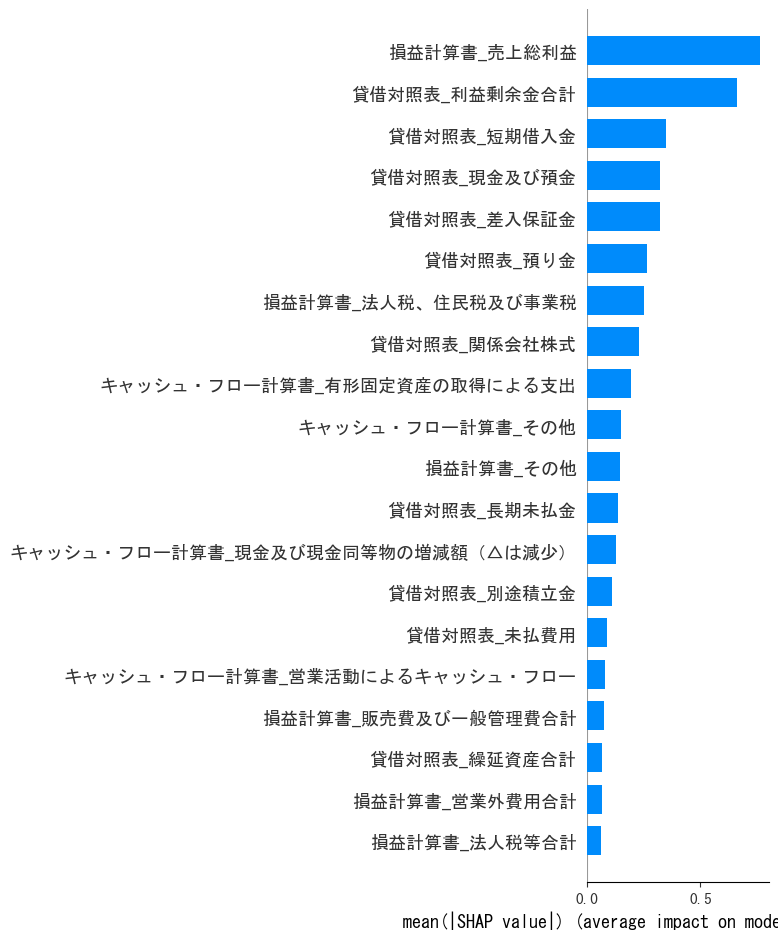


SHAP 平均影響度（上位10特徴量）:
損益計算書_売上総利益: 0.7622
貸借対照表_利益剰余金合計: 0.6610
貸借対照表_短期借入金: 0.3494
貸借対照表_現金及び預金: 0.3230
貸借対照表_差入保証金: 0.3209
貸借対照表_預り金: 0.2646
損益計算書_法人税、住民税及び事業税: 0.2512
貸借対照表_関係会社株式: 0.2315
キャッシュ・フロー計算書_有形固定資産の取得による支出: 0.1934
キャッシュ・フロー計算書_その他: 0.1500

--- Standalone / CatBoost ---
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       0.00      0.00      0.00         3

    accuracy                           0.96        68
   macro avg       0.48      0.50      0.49        68
weighted avg       0.91      0.96      0.93        68

Confusion Matrix:
 [[65  0]
 [ 3  0]]


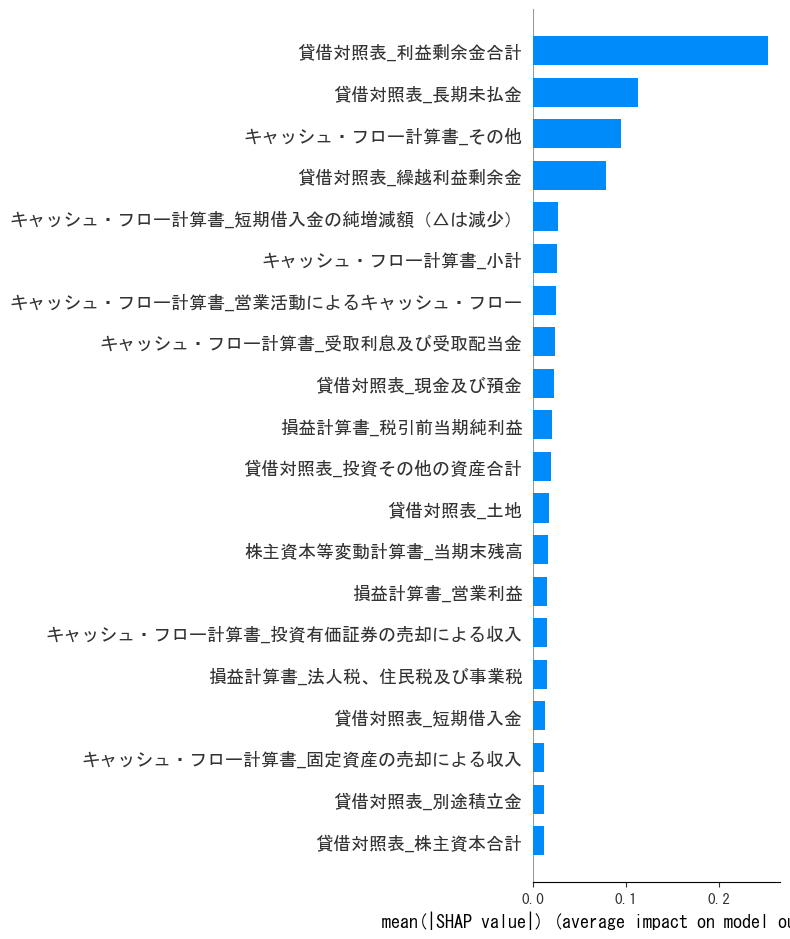


SHAP 平均影響度（上位10特徴量）:
貸借対照表_利益剰余金合計: 0.2523
貸借対照表_長期未払金: 0.1130
キャッシュ・フロー計算書_その他: 0.0941
貸借対照表_繰越利益剰余金: 0.0788
キャッシュ・フロー計算書_短期借入金の純増減額（△は減少）: 0.0276
キャッシュ・フロー計算書_小計: 0.0257
キャッシュ・フロー計算書_営業活動によるキャッシュ・フロー: 0.0247
キャッシュ・フロー計算書_受取利息及び受取配当金: 0.0234
貸借対照表_現金及び預金: 0.0225
損益計算書_税引前当期純利益: 0.0210

--- Standalone / Gradient Boosting ---
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.00      0.00      0.00         3

    accuracy                           0.94        68
   macro avg       0.48      0.49      0.48        68
weighted avg       0.91      0.94      0.93        68

Confusion Matrix:
 [[64  1]
 [ 3  0]]


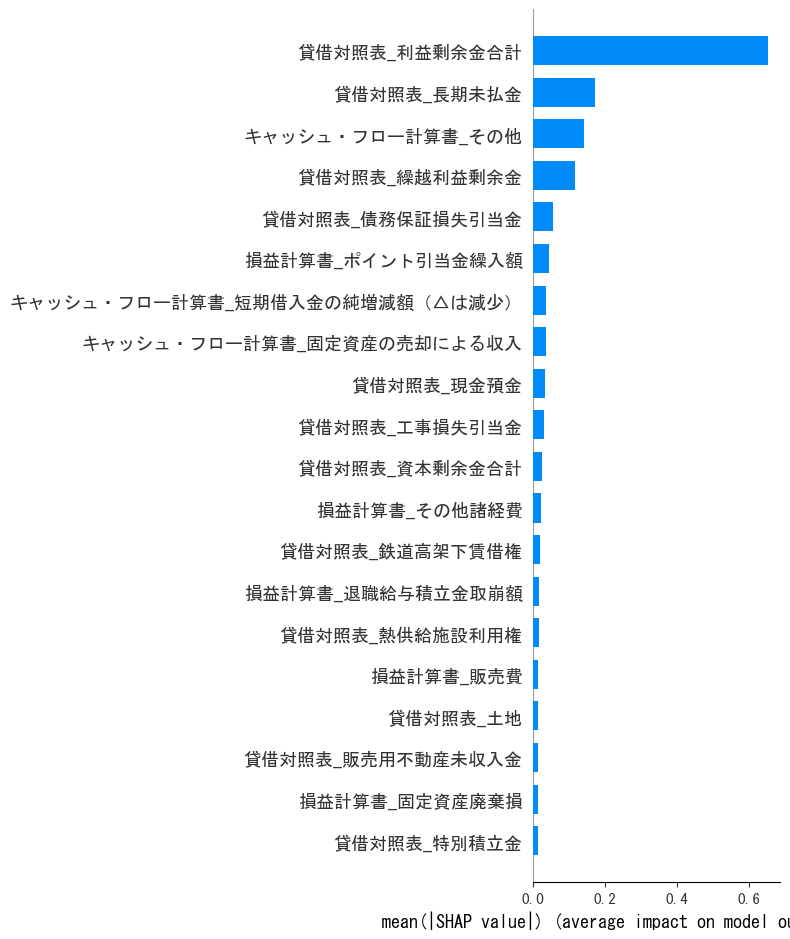


SHAP 平均影響度（上位10特徴量）:
貸借対照表_利益剰余金合計: 0.6521
貸借対照表_長期未払金: 0.1718
キャッシュ・フロー計算書_その他: 0.1413
貸借対照表_繰越利益剰余金: 0.1160
貸借対照表_債務保証損失引当金: 0.0570
損益計算書_ポイント引当金繰入額: 0.0456
キャッシュ・フロー計算書_短期借入金の純増減額（△は減少）: 0.0373
キャッシュ・フロー計算書_固定資産の売却による収入: 0.0372
貸借対照表_現金預金: 0.0347
貸借対照表_工事損失引当金: 0.0317

--- Standalone / KNN ---
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       0.00      0.00      0.00         3

    accuracy                           0.96        68
   macro avg       0.48      0.50      0.49        68
weighted avg       0.91      0.96      0.93        68

Confusion Matrix:
 [[65  0]
 [ 3  0]]

--- Standalone / Nearest Centroid ---
Accuracy: 0.8970588235294118
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        65
           1       0.17      0.33      0.22         3

    accuracy                           0.90        68
   macro avg       0.

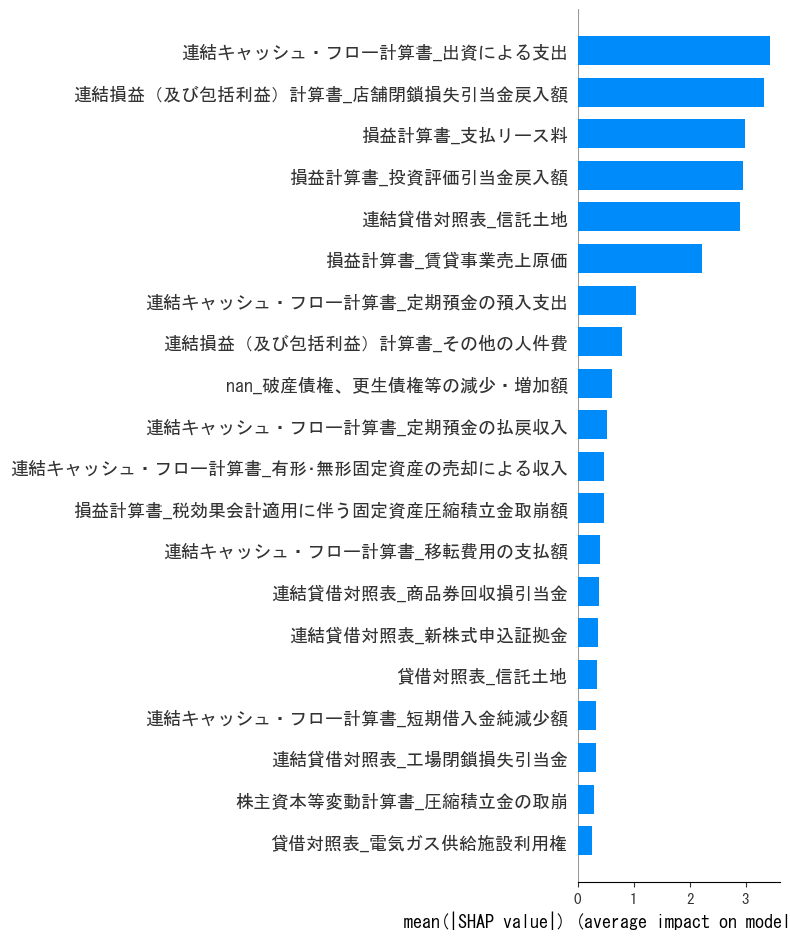


SHAP 平均影響度（上位10特徴量）:
連結キャッシュ・フロー計算書_出資による支出: 3.4429
連結損益（及び包括利益）計算書_店舗閉鎖損失引当金戻入額: 3.3246
損益計算書_支払リース料: 2.9860
損益計算書_投資評価引当金戻入額: 2.9517
連結貸借対照表_信託土地: 2.8913
損益計算書_賃貸事業売上原価: 2.2170
連結キャッシュ・フロー計算書_定期預金の預入支出: 1.0398
連結損益（及び包括利益）計算書_その他の人件費: 0.7865
nan_破産債権、更生債権等の減少・増加額: 0.6066
連結キャッシュ・フロー計算書_定期預金の払戻収入: 0.5193

--- Consolidated / SGDClassifier ---
Accuracy: 0.8979591836734694
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       274
           1       0.27      0.30      0.29        20

    accuracy                           0.90       294
   macro avg       0.61      0.62      0.62       294
weighted avg       0.90      0.90      0.90       294

Confusion Matrix:
 [[258  16]
 [ 14   6]]


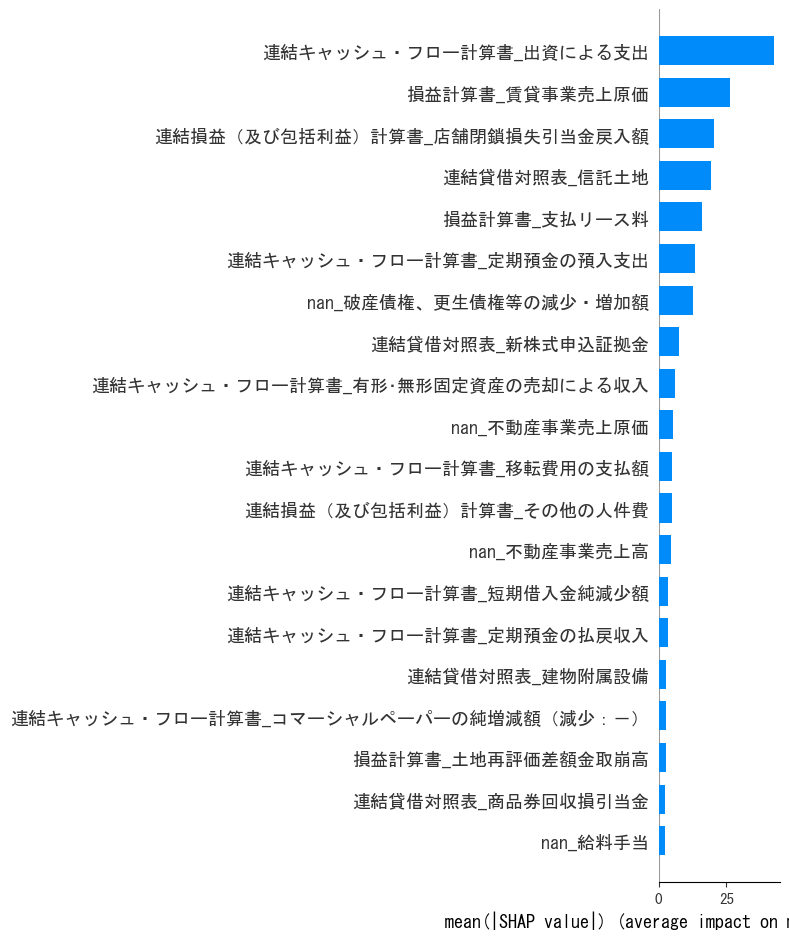


SHAP 平均影響度（上位10特徴量）:
連結キャッシュ・フロー計算書_出資による支出: 42.6282
損益計算書_賃貸事業売上原価: 26.4604
連結損益（及び包括利益）計算書_店舗閉鎖損失引当金戻入額: 20.2498
連結貸借対照表_信託土地: 19.4595
損益計算書_支払リース料: 16.0305
連結キャッシュ・フロー計算書_定期預金の預入支出: 13.2936
nan_破産債権、更生債権等の減少・増加額: 12.5260
連結貸借対照表_新株式申込証拠金: 7.3346
連結キャッシュ・フロー計算書_有形･無形固定資産の売却による収入: 6.0680
nan_不動産事業売上原価: 5.3013

--- Consolidated / SVM ---
Accuracy: 0.8877551020408163
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       274
           1       0.19      0.20      0.20        20

    accuracy                           0.89       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.89      0.89      0.89       294

Confusion Matrix:
 [[257  17]
 [ 16   4]]

--- Consolidated / Gaussian Process ---
Accuracy: 0.9319727891156463
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       274
           1       0.00      0.00      0.00        20

    accuracy               

 97%|=================== | 570/588 [00:14<00:00]       

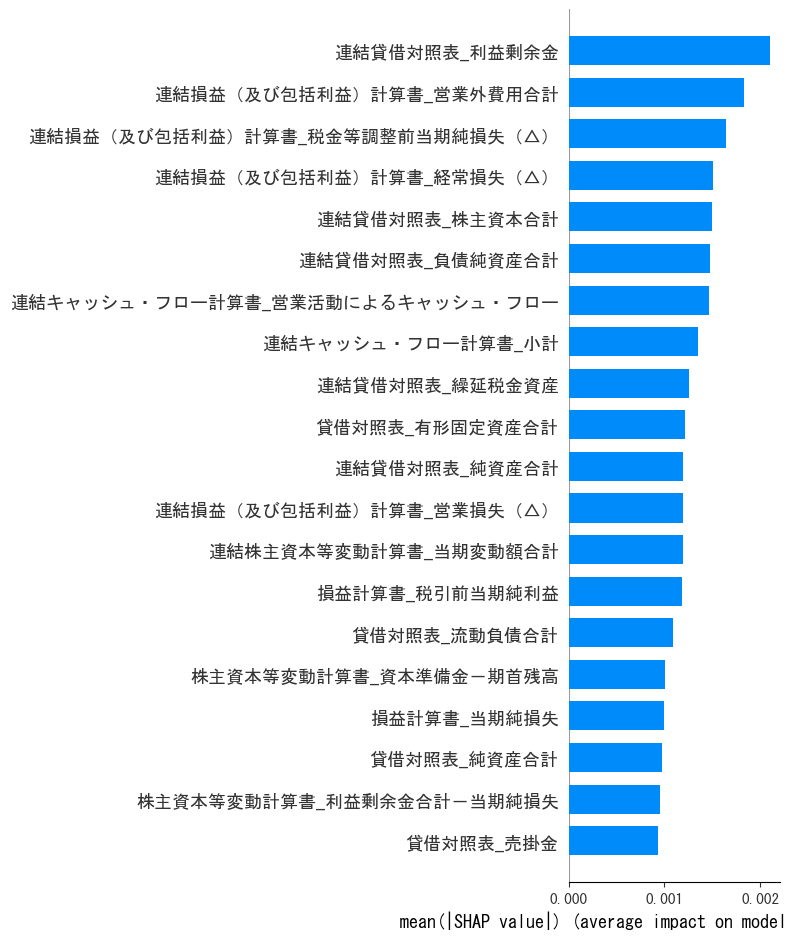


SHAP 平均影響度（上位10特徴量）:
連結貸借対照表_利益剰余金: 0.0021
連結損益（及び包括利益）計算書_営業外費用合計: 0.0018
連結損益（及び包括利益）計算書_税金等調整前当期純損失（△）: 0.0016
連結損益（及び包括利益）計算書_経常損失（△）: 0.0015
連結貸借対照表_株主資本合計: 0.0015
連結貸借対照表_負債純資産合計: 0.0015
連結キャッシュ・フロー計算書_営業活動によるキャッシュ・フロー: 0.0015
連結キャッシュ・フロー計算書_小計: 0.0014
連結貸借対照表_繰延税金資産: 0.0013
貸借対照表_有形固定資産合計: 0.0012

--- Consolidated / Extra Trees ---
Accuracy: 0.935374149659864
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       274
           1       1.00      0.05      0.10        20

    accuracy                           0.94       294
   macro avg       0.97      0.53      0.53       294
weighted avg       0.94      0.94      0.91       294

Confusion Matrix:
 [[274   0]
 [ 19   1]]


 98%|===================| 578/588 [00:28<00:00]        

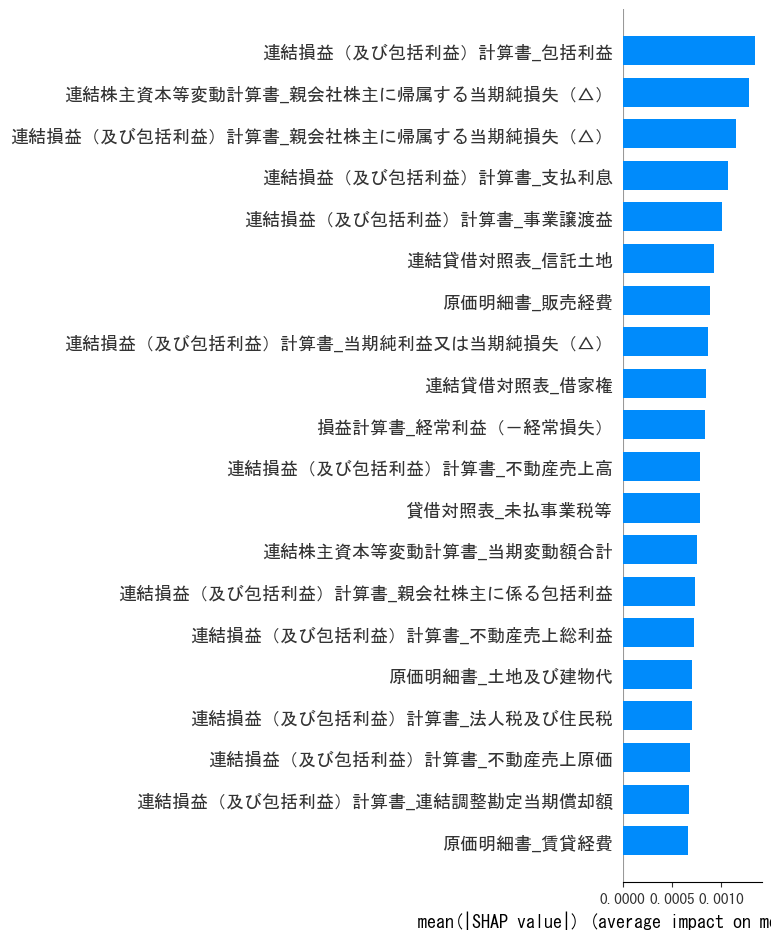


SHAP 平均影響度（上位10特徴量）:
連結損益（及び包括利益）計算書_包括利益: 0.0013
連結株主資本等変動計算書_親会社株主に帰属する当期純損失（△）: 0.0013
連結損益（及び包括利益）計算書_親会社株主に帰属する当期純損失（△）: 0.0012
連結損益（及び包括利益）計算書_支払利息: 0.0011
連結損益（及び包括利益）計算書_事業譲渡益: 0.0010
連結貸借対照表_信託土地: 0.0009
原価明細書_販売経費: 0.0009
連結損益（及び包括利益）計算書_当期純利益又は当期純損失（△）: 0.0009
連結貸借対照表_借家権: 0.0008
損益計算書_経常利益（－経常損失）: 0.0008

--- Consolidated / XGBoost ---
Accuracy: 0.95578231292517
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       274
           1       1.00      0.35      0.52        20

    accuracy                           0.96       294
   macro avg       0.98      0.68      0.75       294
weighted avg       0.96      0.96      0.95       294

Confusion Matrix:
 [[274   0]
 [ 13   7]]


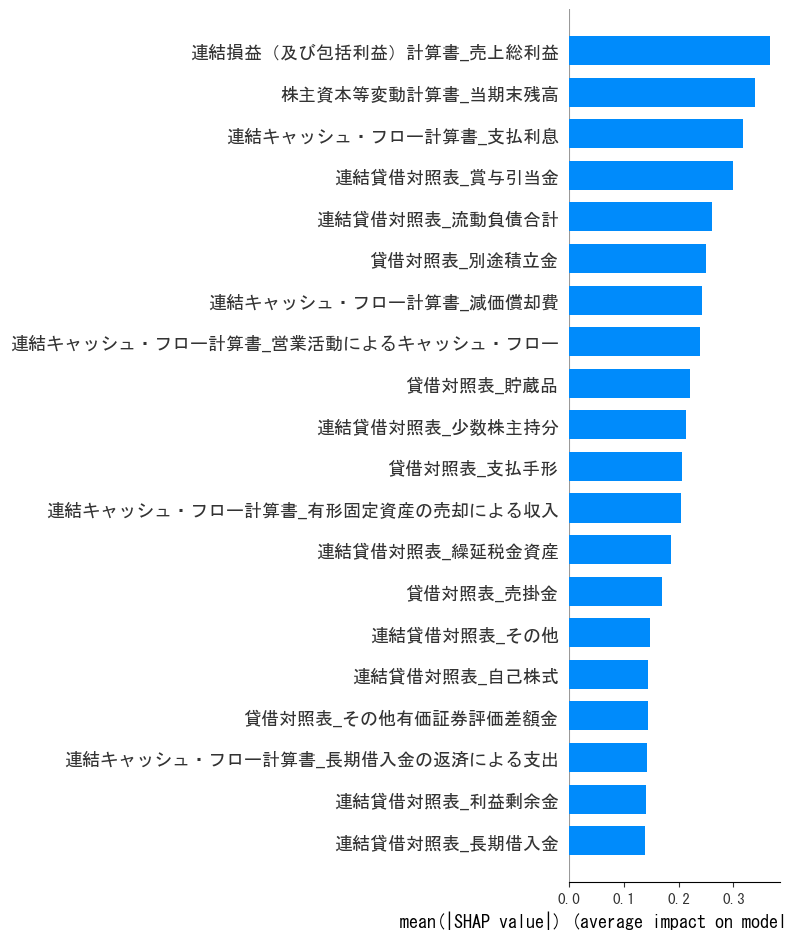


SHAP 平均影響度（上位10特徴量）:
連結損益（及び包括利益）計算書_売上総利益: 0.3664
株主資本等変動計算書_当期末残高: 0.3392
連結キャッシュ・フロー計算書_支払利息: 0.3170
連結貸借対照表_賞与引当金: 0.2995
連結貸借対照表_流動負債合計: 0.2612
貸借対照表_別途積立金: 0.2506
連結キャッシュ・フロー計算書_減価償却費: 0.2432
連結キャッシュ・フロー計算書_営業活動によるキャッシュ・フロー: 0.2392
貸借対照表_貯蔵品: 0.2211
連結貸借対照表_少数株主持分: 0.2133

--- Consolidated / CatBoost ---
Accuracy: 0.9489795918367347
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       274
           1       1.00      0.25      0.40        20

    accuracy                           0.95       294
   macro avg       0.97      0.62      0.69       294
weighted avg       0.95      0.95      0.93       294

Confusion Matrix:
 [[274   0]
 [ 15   5]]


 99%|===================| 290/294 [00:45<00:00]        

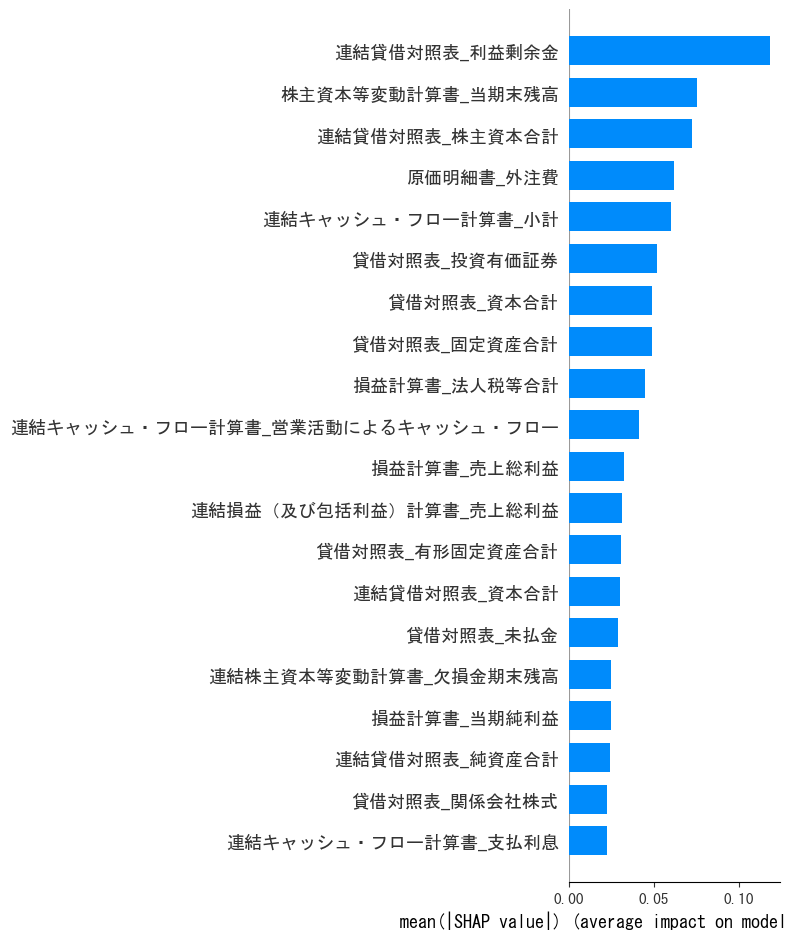


SHAP 平均影響度（上位10特徴量）:
連結貸借対照表_利益剰余金: 0.1183
株主資本等変動計算書_当期末残高: 0.0755
連結貸借対照表_株主資本合計: 0.0722
原価明細書_外注費: 0.0619
連結キャッシュ・フロー計算書_小計: 0.0599
貸借対照表_投資有価証券: 0.0520
貸借対照表_資本合計: 0.0492
貸借対照表_固定資産合計: 0.0489
損益計算書_法人税等合計: 0.0449
連結キャッシュ・フロー計算書_営業活動によるキャッシュ・フロー: 0.0412

--- Consolidated / Gradient Boosting ---
Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       274
           1       0.88      0.35      0.50        20

    accuracy                           0.95       294
   macro avg       0.91      0.67      0.74       294
weighted avg       0.95      0.95      0.94       294

Confusion Matrix:
 [[273   1]
 [ 13   7]]


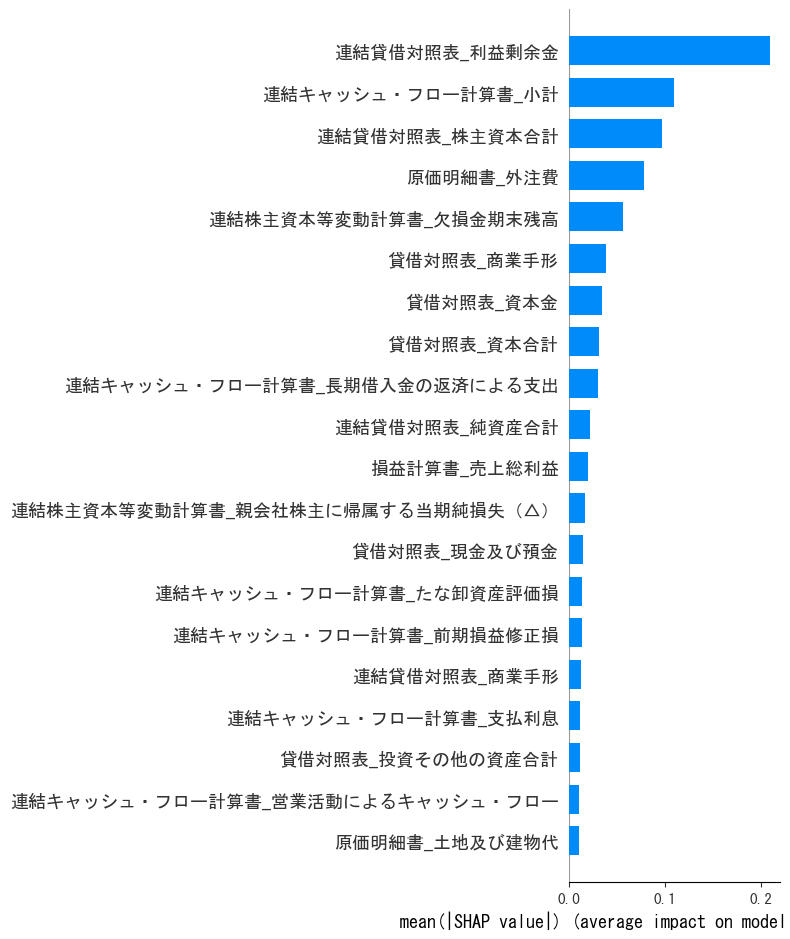


SHAP 平均影響度（上位10特徴量）:
連結貸借対照表_利益剰余金: 0.2096
連結キャッシュ・フロー計算書_小計: 0.1097
連結貸借対照表_株主資本合計: 0.0967
原価明細書_外注費: 0.0787
連結株主資本等変動計算書_欠損金期末残高: 0.0564
貸借対照表_商業手形: 0.0391
貸借対照表_資本金: 0.0352
貸借対照表_資本合計: 0.0315
連結キャッシュ・フロー計算書_長期借入金の返済による支出: 0.0308
連結貸借対照表_純資産合計: 0.0219

--- Consolidated / KNN ---
Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       274
           1       0.00      0.00      0.00        20

    accuracy                           0.93       294
   macro avg       0.47      0.50      0.48       294
weighted avg       0.87      0.93      0.90       294

Confusion Matrix:
 [[273   1]
 [ 20   0]]

--- Consolidated / Nearest Centroid ---
Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       274
           1       0.21      0.15      0.18        20

    accuracy                           0.90       294
   macro avg       0.58      0.

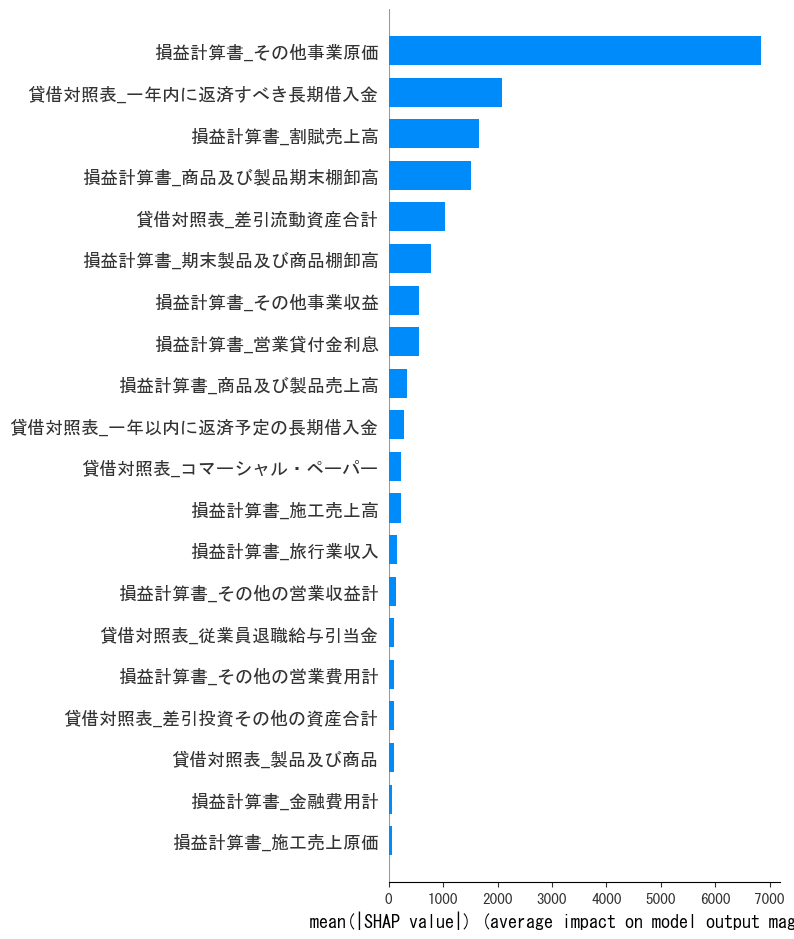


SHAP 平均影響度（上位10特徴量）:
損益計算書_その他事業原価: 6847.6206
貸借対照表_一年内に返済すべき長期借入金: 2084.1247
損益計算書_割賦売上高: 1654.4625
損益計算書_商品及び製品期末棚卸高: 1516.0259
貸借対照表_差引流動資産合計: 1034.5929
損益計算書_期末製品及び商品棚卸高: 780.7093
損益計算書_その他事業収益: 562.3950
損益計算書_営業貸付金利息: 550.9373
損益計算書_商品及び製品売上高: 337.0692
貸借対照表_一年以内に返済予定の長期借入金: 283.4632

--- Combined / SGDClassifier ---
Accuracy: 0.856353591160221
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       339
           1       0.13      0.22      0.16        23

    accuracy                           0.86       362
   macro avg       0.54      0.56      0.54       362
weighted avg       0.89      0.86      0.87       362

Confusion Matrix:
 [[305  34]
 [ 18   5]]


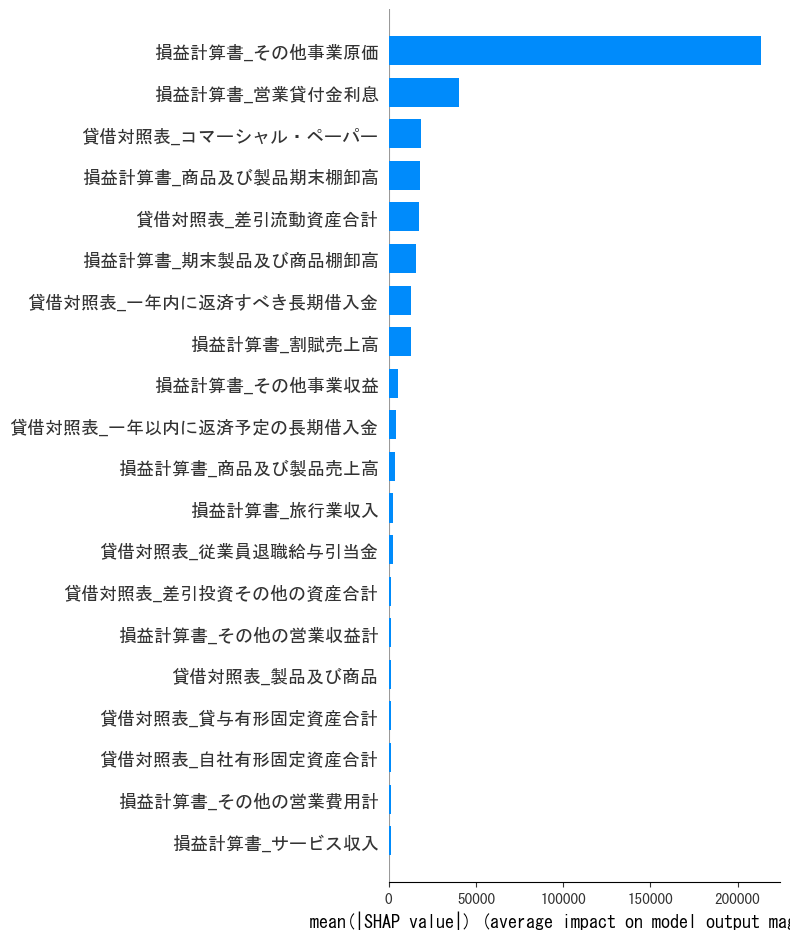


SHAP 平均影響度（上位10特徴量）:
損益計算書_その他事業原価: 213613.8094
損益計算書_営業貸付金利息: 40162.1926
貸借対照表_コマーシャル・ペーパー: 18473.0236
損益計算書_商品及び製品期末棚卸高: 17652.7332
貸借対照表_差引流動資産合計: 17628.2171
損益計算書_期末製品及び商品棚卸高: 15764.0564
貸借対照表_一年内に返済すべき長期借入金: 12912.5462
損益計算書_割賦売上高: 12674.8404
損益計算書_その他事業収益: 5525.7394
貸借対照表_一年以内に返済予定の長期借入金: 4028.7877

--- Combined / SVM ---


KeyboardInterrupt: 

In [43]:
# SHAPで使うためにDataFrame型も渡す
evaluate_all_models(X_train_s, X_test_s, y_train_s, y_test_s, "Standalone", X_df=X_test_s)
evaluate_all_models(X_train_c, X_test_c, y_train_c, y_test_c, "Consolidated", X_df=X_test_c)
evaluate_all_models(X_train_combined, X_test_combined, y_train_combined, y_test_combined, "Combined", X_df=X_test_combined)

In [11]:
from sklearn.impute import SimpleImputer

def safe_preprocess(X_train, X_test, model_name):
    # NaNを許容しないモデル名のリスト


    models_require_imputation = [
        "Logistic Regression", "SGDClassifier", "SVM", "Gaussian Process",
        "Random Forest", "Extra Trees", "Gradient Boosting", "LDA", "QDA",
        "MLP", "Nearest Centroid", "KNN", "Naive Bayes", "VotingClassifier"
    ]

    
    if model_name in models_require_imputation:
        imputer = SimpleImputer(strategy='mean')
        X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
        X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    # NaNをそのまま許容するモデルは処理なし
    return X_train, X_test

In [5]:
evaluate_all_models(X_train_combined, X_test_combined, y_train_combined, y_test_combined, "Combined", X_df=X_test_combined)

NameError: name 'evaluate_all_models' is not defined

In [18]:
import os
import pandas as pd
import re

# 評価結果フォルダと出力先
results_dir = "results"
output_dir = "results_summary"
os.makedirs(output_dir, exist_ok=True)

# 対象の比率
ratios = ["1_to_2", "1_to_5", "1_to_10", "1_to_20"]

# ファイルを集約して1つの DataFrame にする
all_results = []

for file in os.listdir(results_dir):
    if file.endswith(".csv"):
        # 柔軟なファイル名解析
        match = re.match(r"(.+?)_(.+?)_評価結果(?:_([0-9a-zA-Z_]+))?\.csv", file)
        if match:
            label = match.group(1)
            model = match.group(2)
            ratio = match.group(3) if match.group(3) else "N/A"

            if ratio not in ratios:
                continue  # 対象外の比率はスキップ

            file_path = os.path.join(results_dir, file)
            df = pd.read_csv(file_path)

            df["構成"] = label
            df["モデル"] = model
            df["データ比"] = ratio

            all_results.append(df)

# すべて統合
if all_results:
    combined_df = pd.concat(all_results, ignore_index=True)
    combined_df.to_csv(os.path.join(output_dir, "全モデル評価結果_比率別まとめ.csv"), index=False, encoding='utf-8-sig')
    print("✅ すべての比率別モデル評価結果を統合しました。")
else:
    print("⚠️ 評価結果CSVが見つかりませんでした。")


✅ すべての比率別モデル評価結果を統合しました。


In [16]:
# SHAPで使うためにDataFrame型も渡す
evaluate_all_models(X_train_s, X_test_s, y_train_s, y_test_s, "Standalone", X_df=X_test_s)



========== Standalone ==========

--- Standalone / Neural Network ---
3/3 [==============================] - 1s 378ms/step
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       0.00      0.00      0.00         3

    accuracy                           0.96        68
   macro avg       0.48      0.50      0.49        68
weighted avg       0.91      0.96      0.93        68

Confusion Matrix:
 [[65  0]
 [ 3  0]]
